# Aligned SOMs Evaluation on Chainlink Dataset

**Authors:**   
Markus Kiesel (01228952)   
Alexander Melem(11809621)   
Laurenz Ruzicka (01619916)

**Github:**

[https://github.com/Znerual/AlignedSOM](https://github.com/Znerual/AlignedSOM)

In [1]:
import os, sys
import numpy as np

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
  sys.path.append(module_path)

from src.data import load_dataset
from src.config import config
from src.aligned_som import AlignedSom
from src.visualize import plot_aligned_som, HitHist, UMatrix, SDH

DATASET_NAME = 'chainlink'

In [2]:
def setup(som_dim, num_layers, aspect_selection,
          sigma=1.0,
          learning_rate=0.5,
          layer_distance_ratio=0.1,
          num_plots=5,
          train_steps_by_layer=1000,
          random_seed=config.SEED,
          load_existing=True):

    input_data, components, weights, classinfo = load_dataset(DATASET_NAME)
    data = input_data['arr']
    aspect_selection = np.array(aspect_selection)
   
    asom = AlignedSom(
        som_dim, data, aspect_selection,
        num_layers=num_layers,
        sigma=sigma,
        learning_rate=learning_rate,
        layer_distance_ratio=layer_distance_ratio,
        random_seed=random_seed)
    
    os.makedirs("../results", exist_ok=True)
    
    if load_existing and os.path.exists(f"../results/{DATASET_NAME}_setup_{som_dim[0]}_{som_dim[1]}_{num_layers}_{sigma}_{layer_distance_ratio}_{learning_rate}_{'-'.join([str(c) for c in aspect_selection])}.npy"):
        asom.set_layer_weights(np.load(f"../results/{DATASET_NAME}_setup_{som_dim[0]}_{som_dim[1]}_{num_layers}_{sigma}_{layer_distance_ratio}_{learning_rate}_{'-'.join([str(c) for c in aspect_selection])}.npy"))
    else:
        asom.train(train_steps_by_layer * num_layers)
        np.save(f"../results/{DATASET_NAME}_setup_{som_dim[0]}_{som_dim[1]}_{num_layers}_{sigma}_{layer_distance_ratio}_{learning_rate}_{'-'.join([str(c) for c in aspect_selection])}.npy", np.array(asom.get_layer_weights()))
    
    fig = plot_aligned_som(asom, data, num_plots=num_plots, upscaling_factor=100)
    fig.savefig(f"../results/{DATASET_NAME}_setup_{som_dim[0]}_{som_dim[1]}_{num_layers}_{sigma}_{layer_distance_ratio}_{learning_rate}_{'-'.join([str(c) for c in aspect_selection])}.pdf")
    
    visualization_function = UMatrix
    fig_umatrix = plot_aligned_som(asom, data, num_plots=num_plots, upscaling_factor=100, visualization_function=visualization_function)
    fig_umatrix.savefig(f"../results/{DATASET_NAME}_setup_{visualization_function.__name__}_{som_dim[0]}_{som_dim[1]}_{num_layers}_{sigma}_{layer_distance_ratio}_{learning_rate}_{'-'.join([str(c) for c in aspect_selection])}.pdf")
    
    visualization_function = HitHist
    fig_hit = plot_aligned_som(asom, data, num_plots=num_plots, upscaling_factor=100, visualization_function=visualization_function)
    fig_hit.savefig(f"../results/{DATASET_NAME}_setup_{visualization_function.__name__}_{som_dim[0]}_{som_dim[1]}_{num_layers}_{sigma}_{layer_distance_ratio}_{learning_rate}_{'-'.join([str(c) for c in aspect_selection])}.pdf")
    
    return asom

# Dataset

>
> The chain link data set, sometimes also called intertwined rings, is a classic example of a data set that provokes topology preservation vialitions. The data set contains two rings, each two-dimensional, that are intertwined in a three-dimensional space. When projecting this data set to a two-dimensional output space, the rings have to "break".
>
> <cite> http://www.ifs.tuwien.ac.at/dm/somtoolbox/datasets.html

As described in the 10 clusters notebook, the chainlink dataset is an artificial dataset, which hindered us from finding a data based aspect split. Therefore, we focused on the algorithm instead of the data.

We used the same experimental design as for the 10 clusters dataset. As a result, we find similar conclusions for the plots, which led to the decision to leave out the figure-wise descriptions. A detailed report of the experiment can be found in the 10 clusters dataset.

In [3]:
input_data, components, weights, classinfo = load_dataset('10clusters')
data = input_data['arr']
data.shape

(850, 10)

## Alignd SOMs on Chainlink 10x10

In [4]:
SOM_DIM = (10, 10)
N_LAYERS = 31
ASPECT_SELECTION = [1, 1, 0]

### Default Setup

The baseline for all our experiments with the chainlink dataset consists of a 10x10 units ASOM, trained with 31 layers and a layer distance ratio of 0.1. 

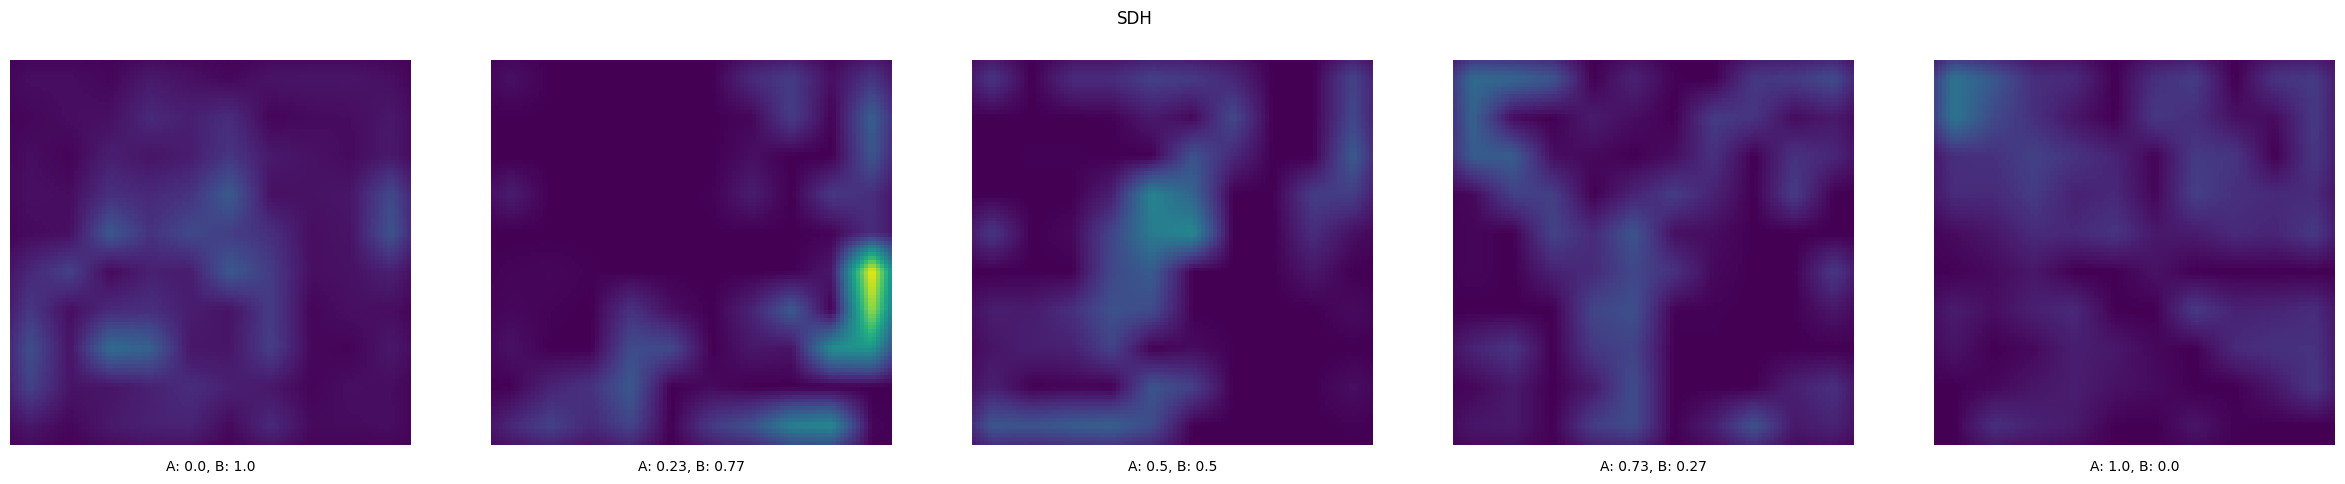

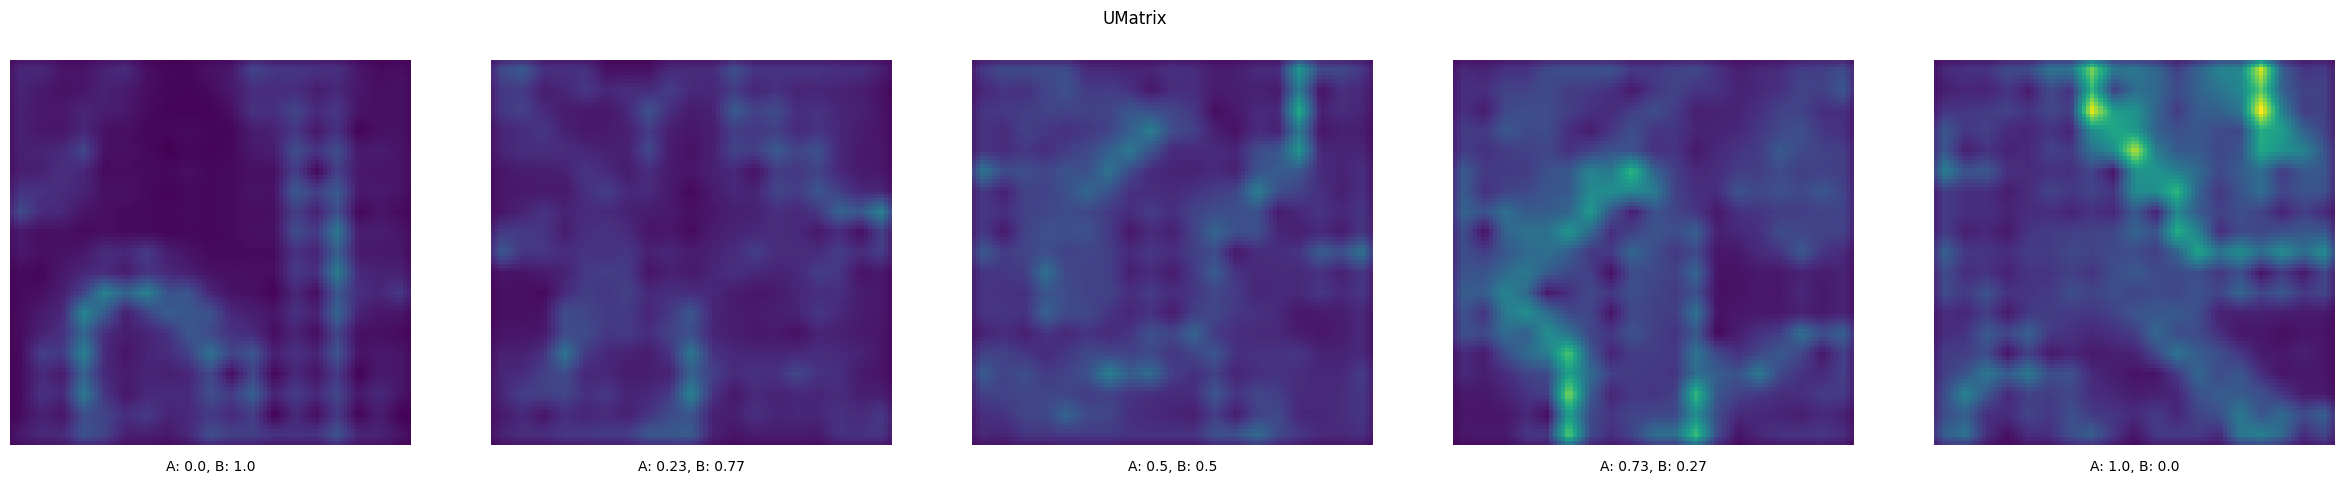

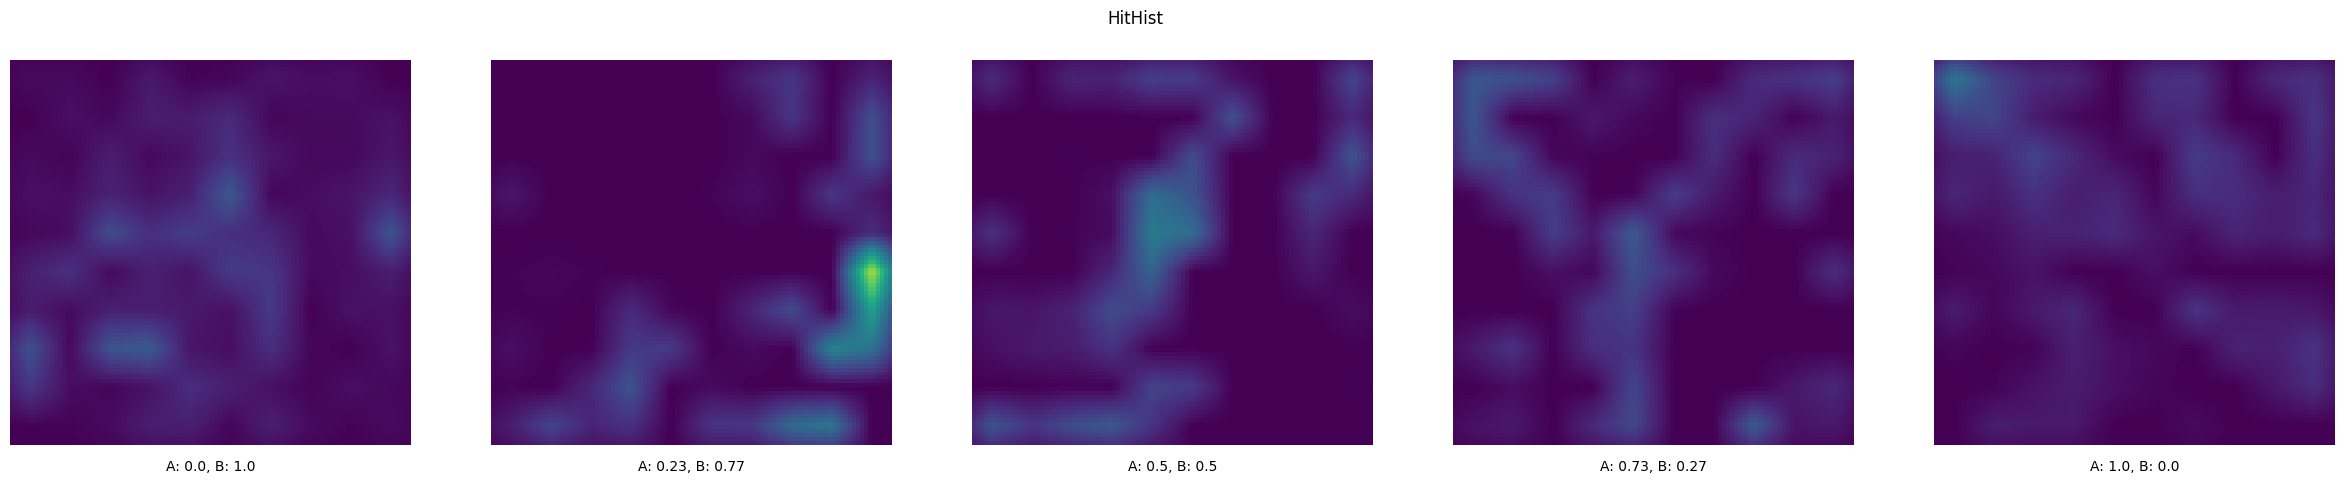

In [5]:
asom_small_1 = setup(
    som_dim=SOM_DIM,
    num_layers=N_LAYERS,
    aspect_selection=ASPECT_SELECTION)

### Many In-Between Layers

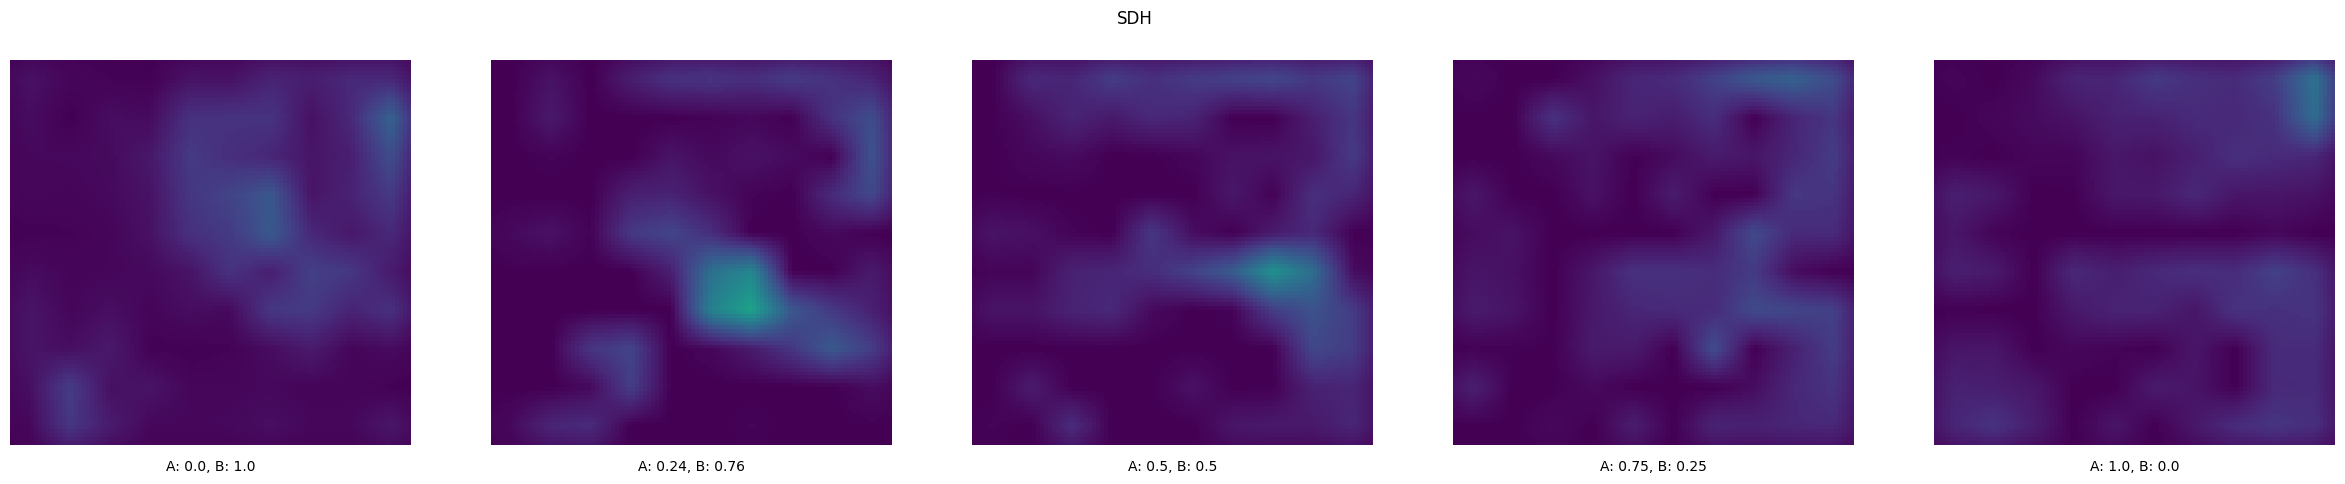

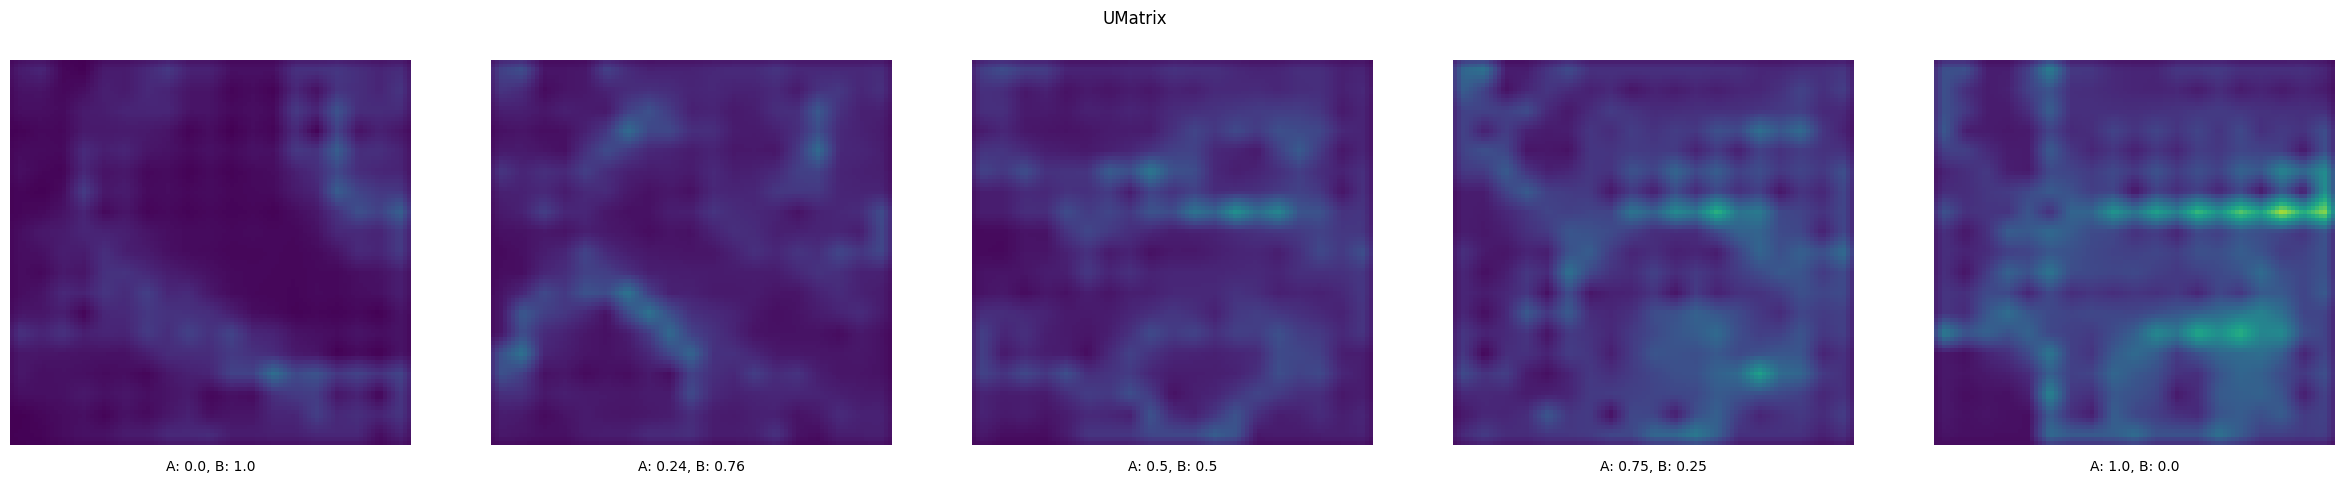

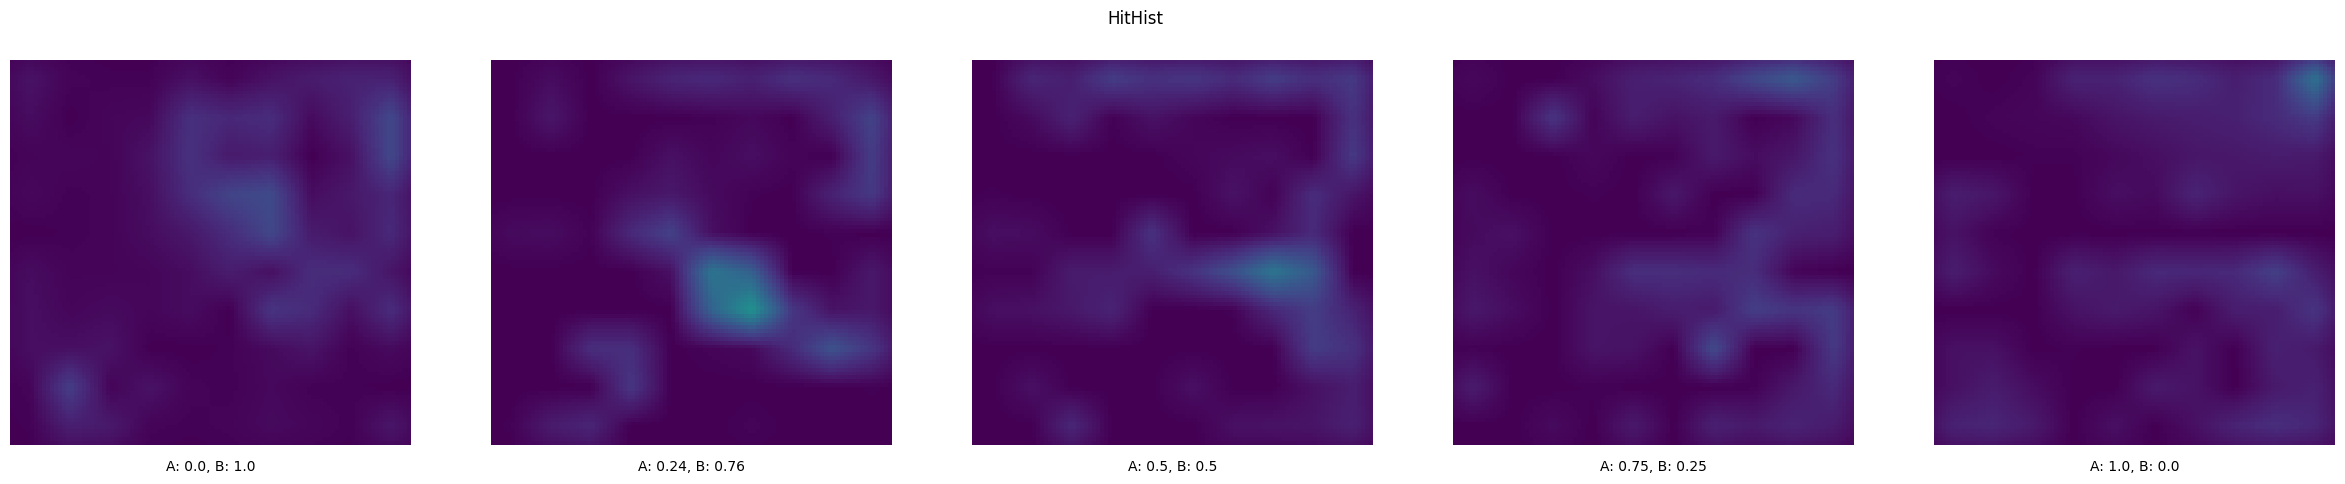

In [6]:
som_small_2 = setup(
    som_dim=SOM_DIM,
    num_layers=128,
    aspect_selection=ASPECT_SELECTION)

### Strong Layer-Wise Coupling

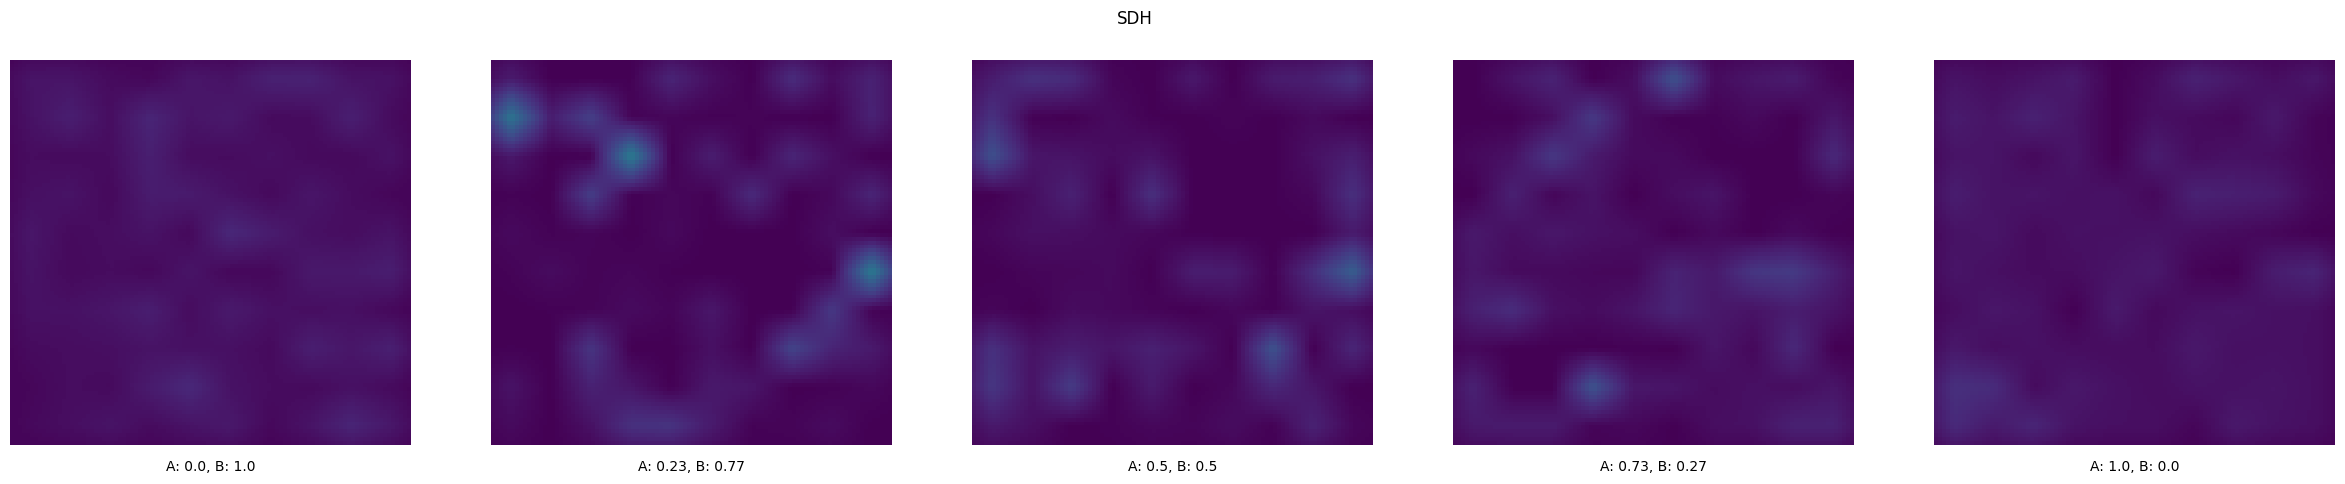

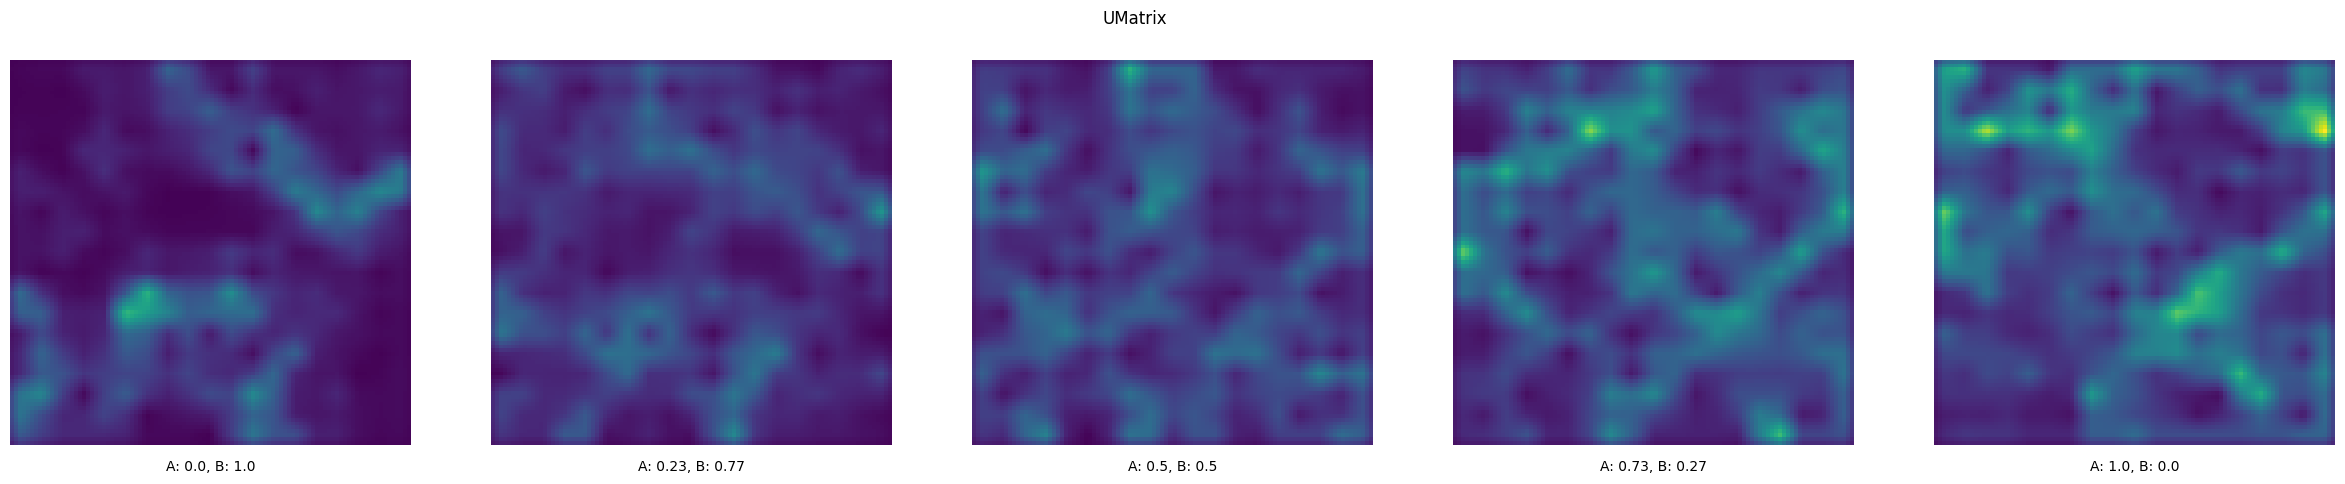

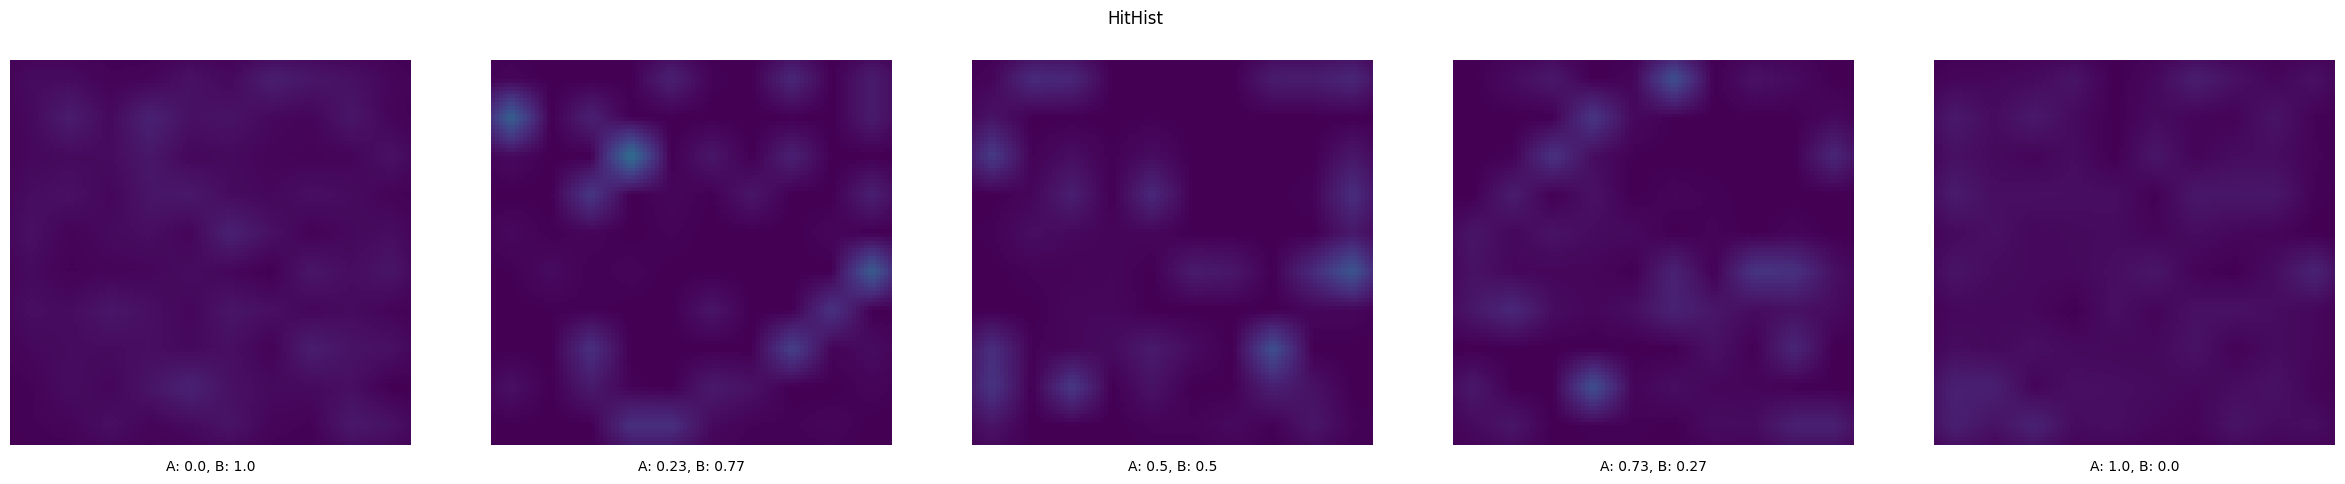

In [7]:
asom_small_3 = setup(
    som_dim=SOM_DIM,
    num_layers=N_LAYERS,
    aspect_selection=ASPECT_SELECTION,
    layer_distance_ratio=10)

### Weak Layer-Wise Coupling

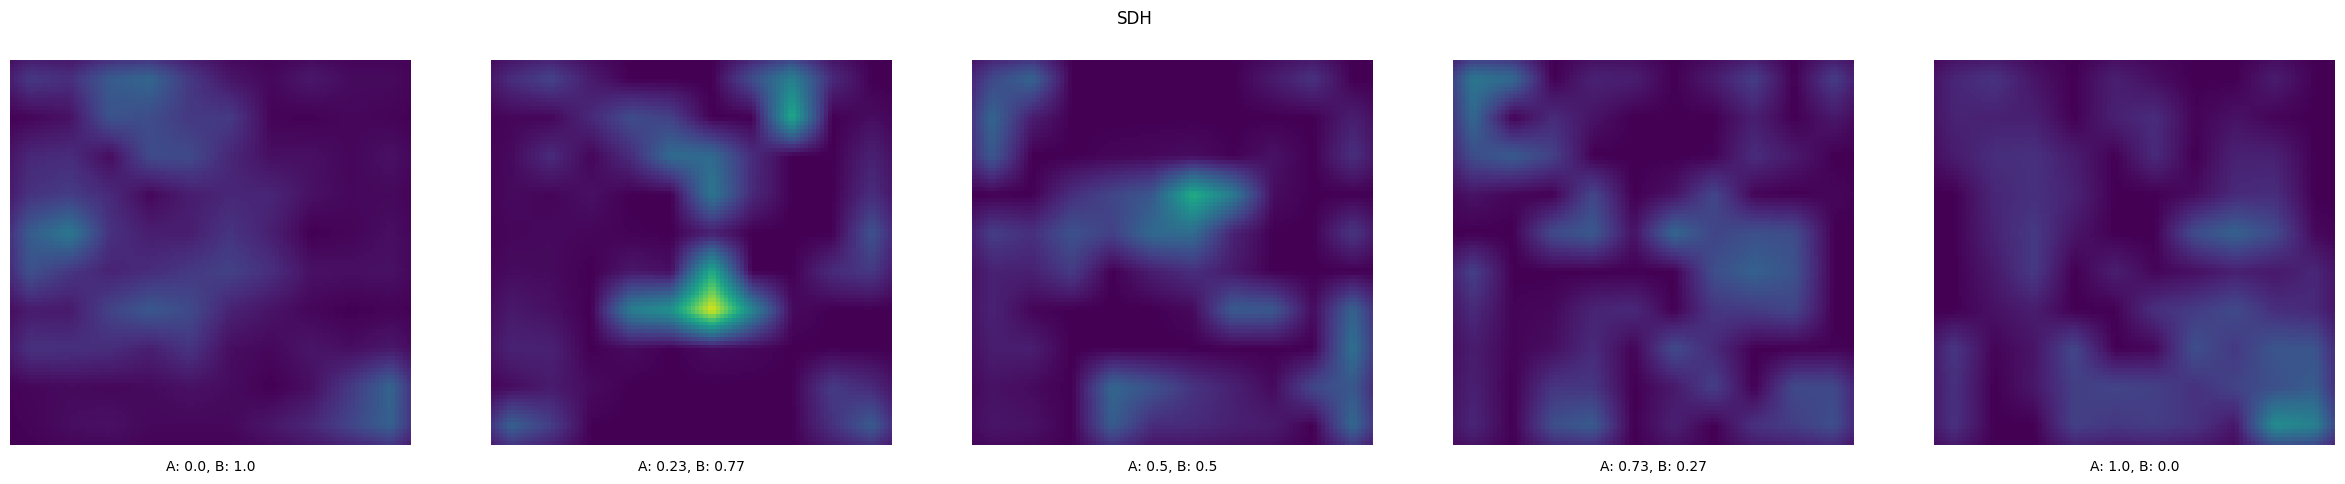

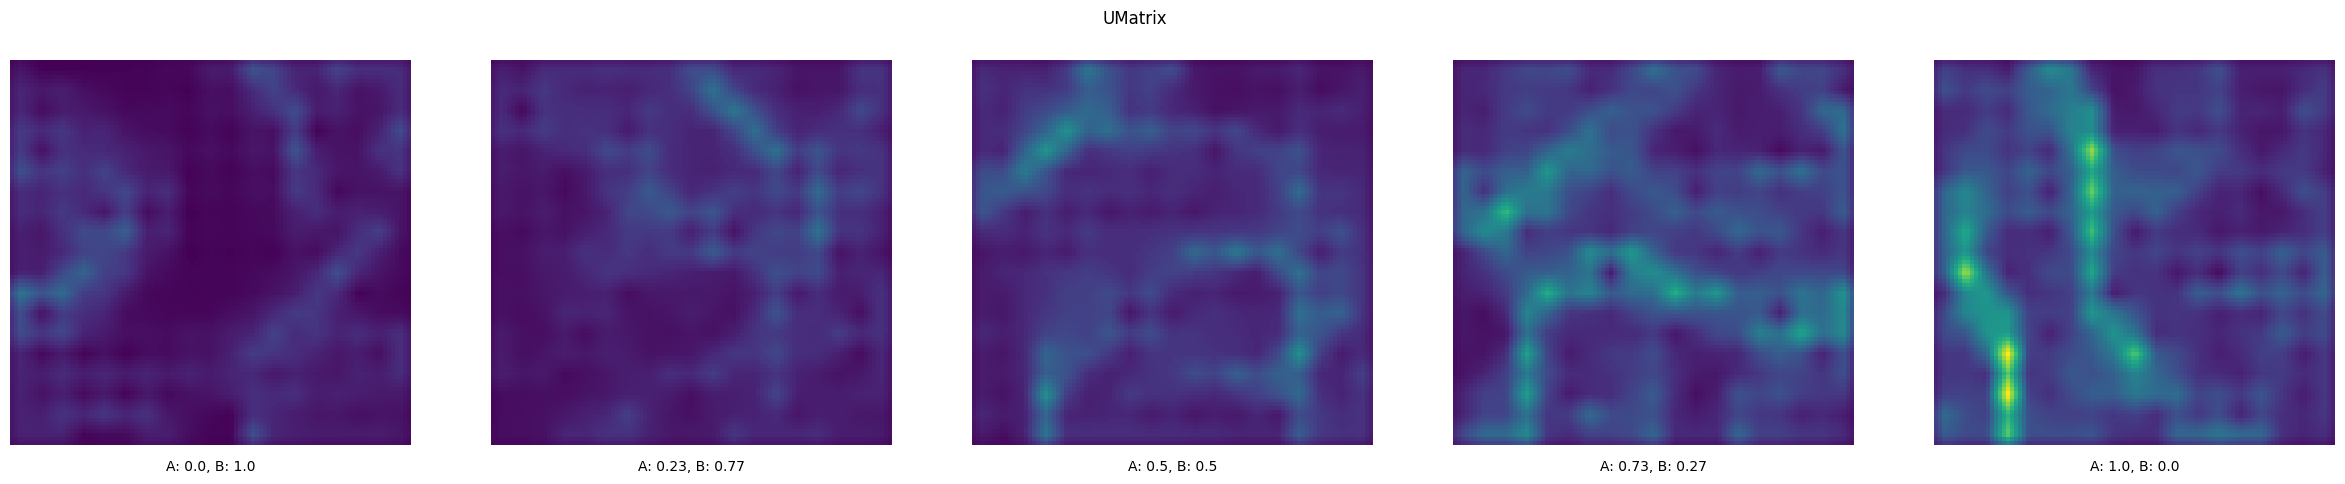

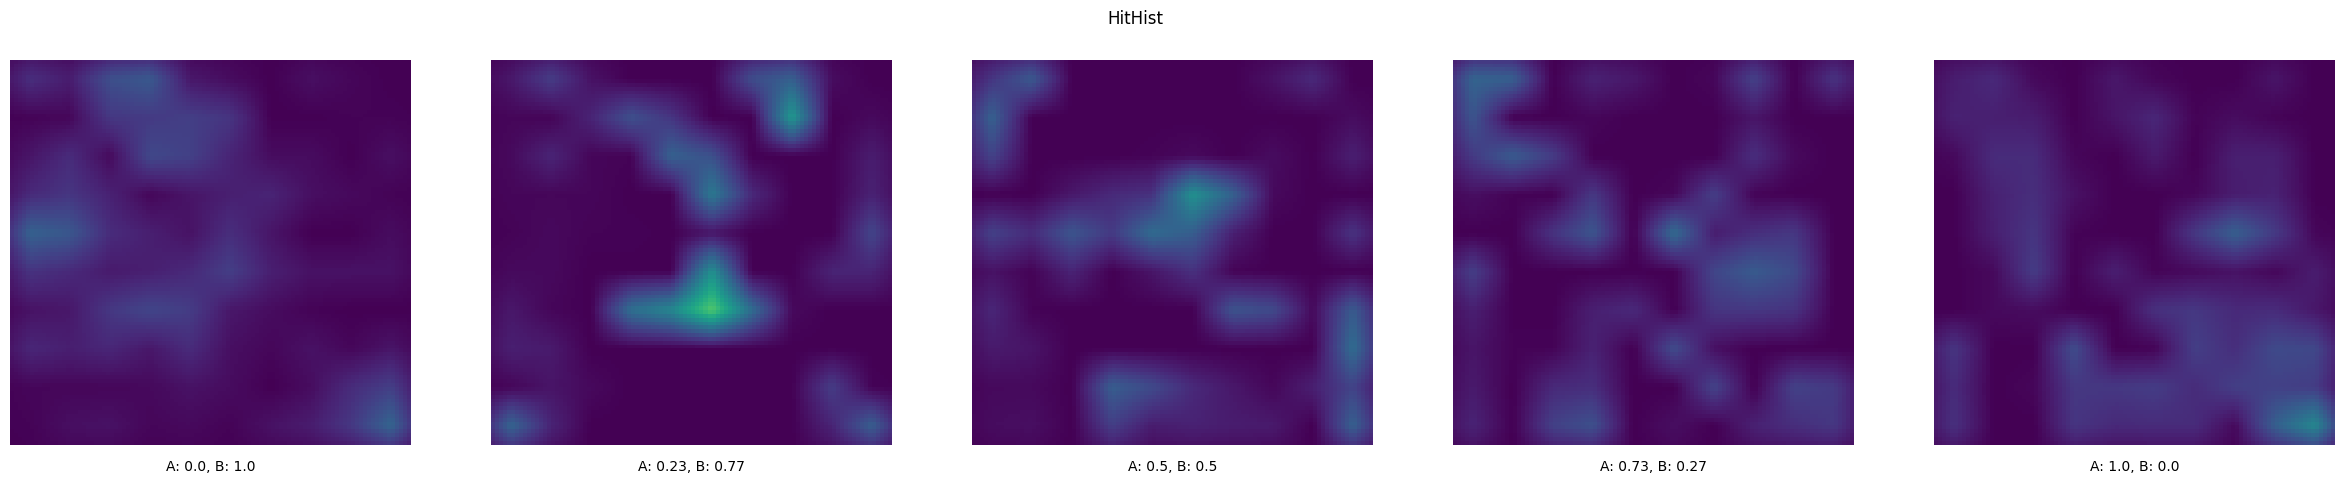

In [8]:
asom_small_4 = setup(
    som_dim=SOM_DIM,
    num_layers=N_LAYERS,
    aspect_selection=ASPECT_SELECTION,
    layer_distance_ratio=1e-3)

### Few In-Between Layers

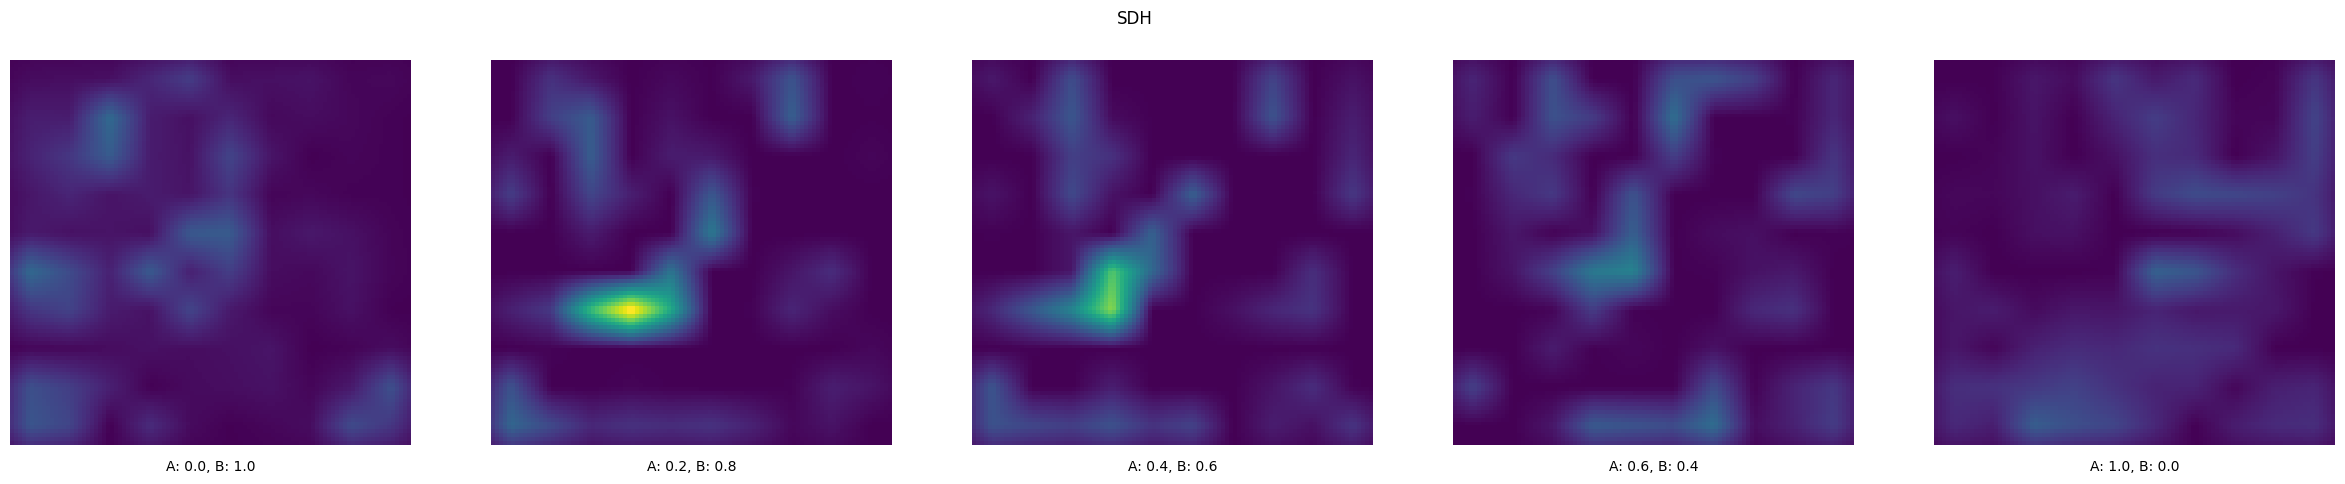

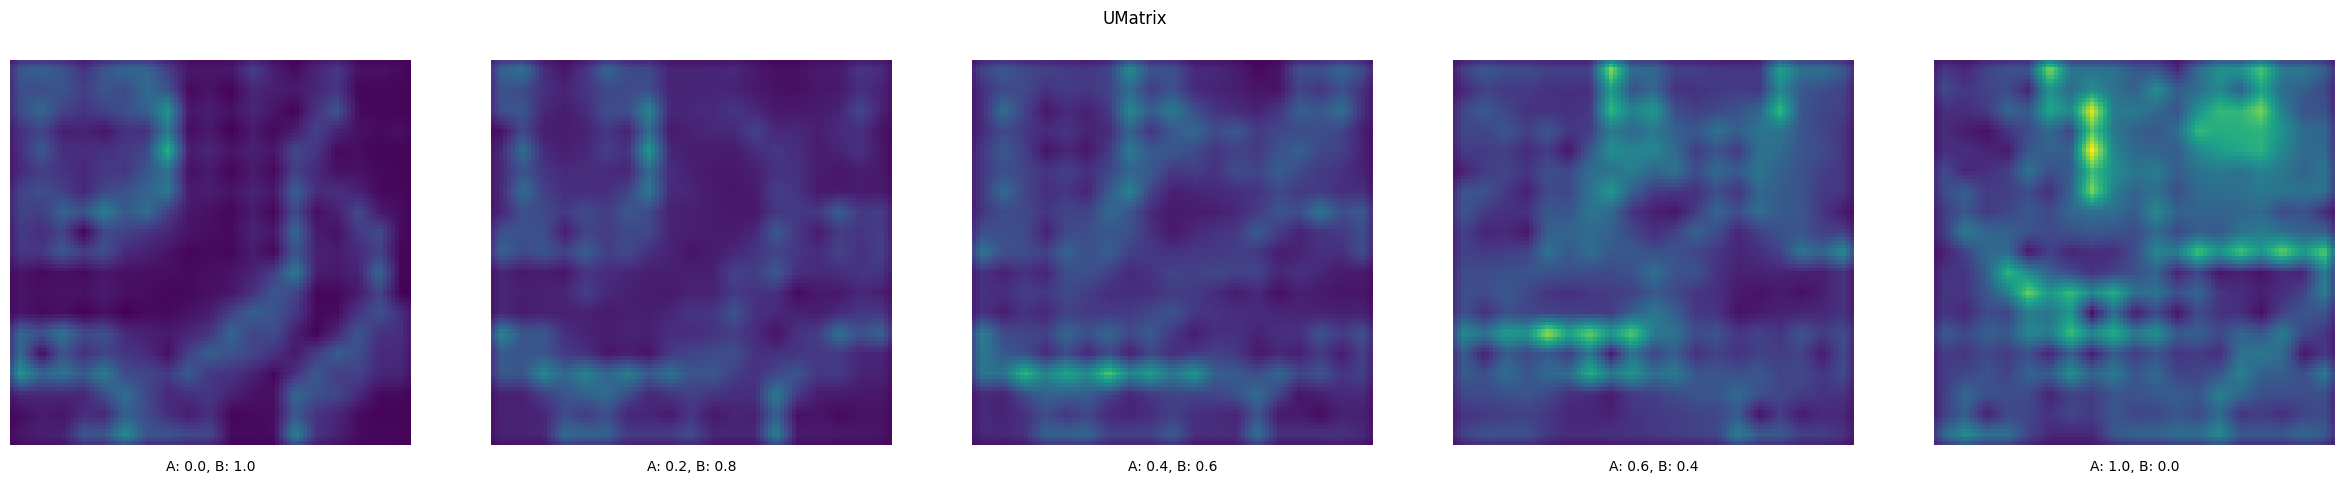

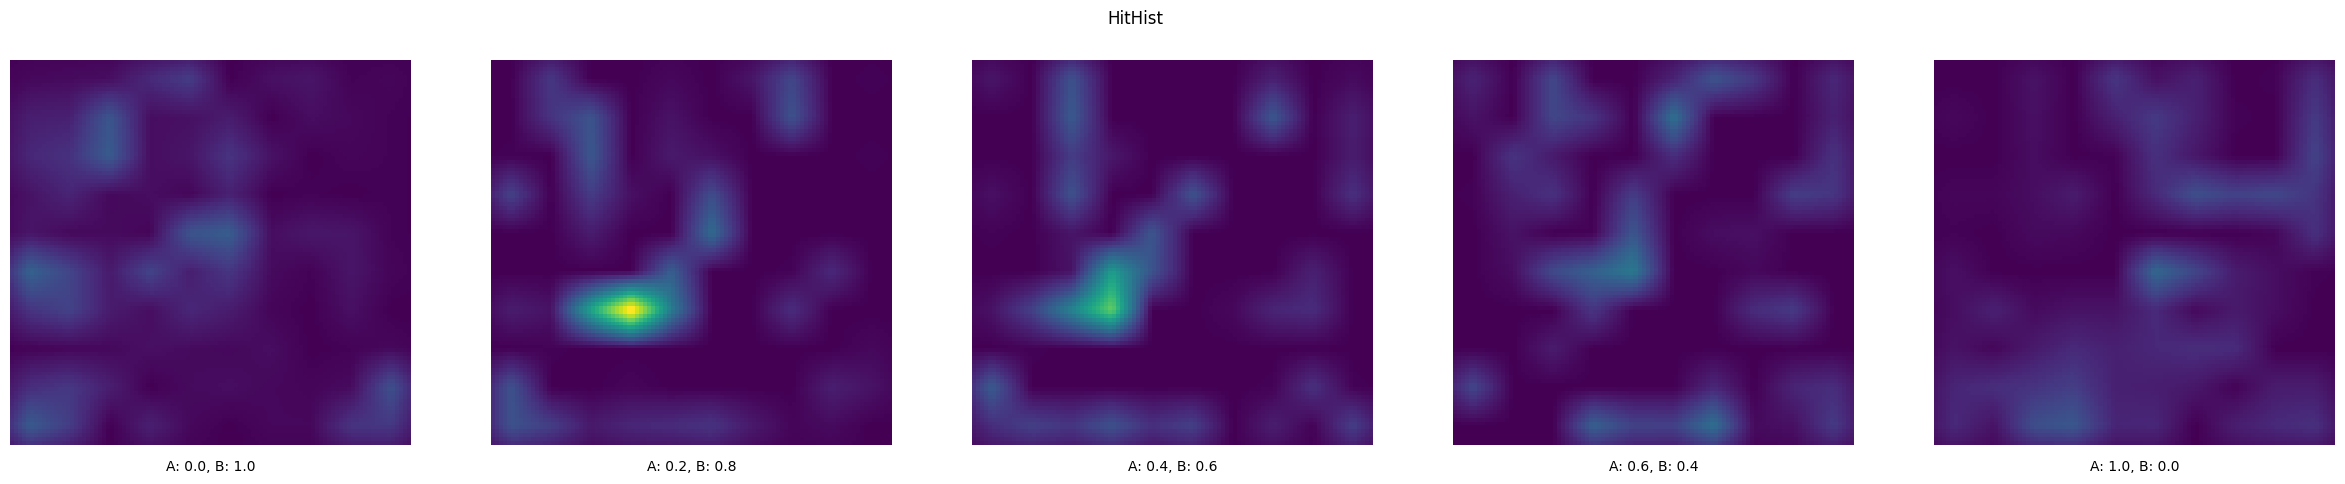

In [9]:
asom_small_5 = setup(
    som_dim=SOM_DIM,
    num_layers=6,
    aspect_selection=ASPECT_SELECTION)

### Switch Aspect Indices

100%|██████████| 6000/6000 [00:03<00:00, 1584.94it/s]


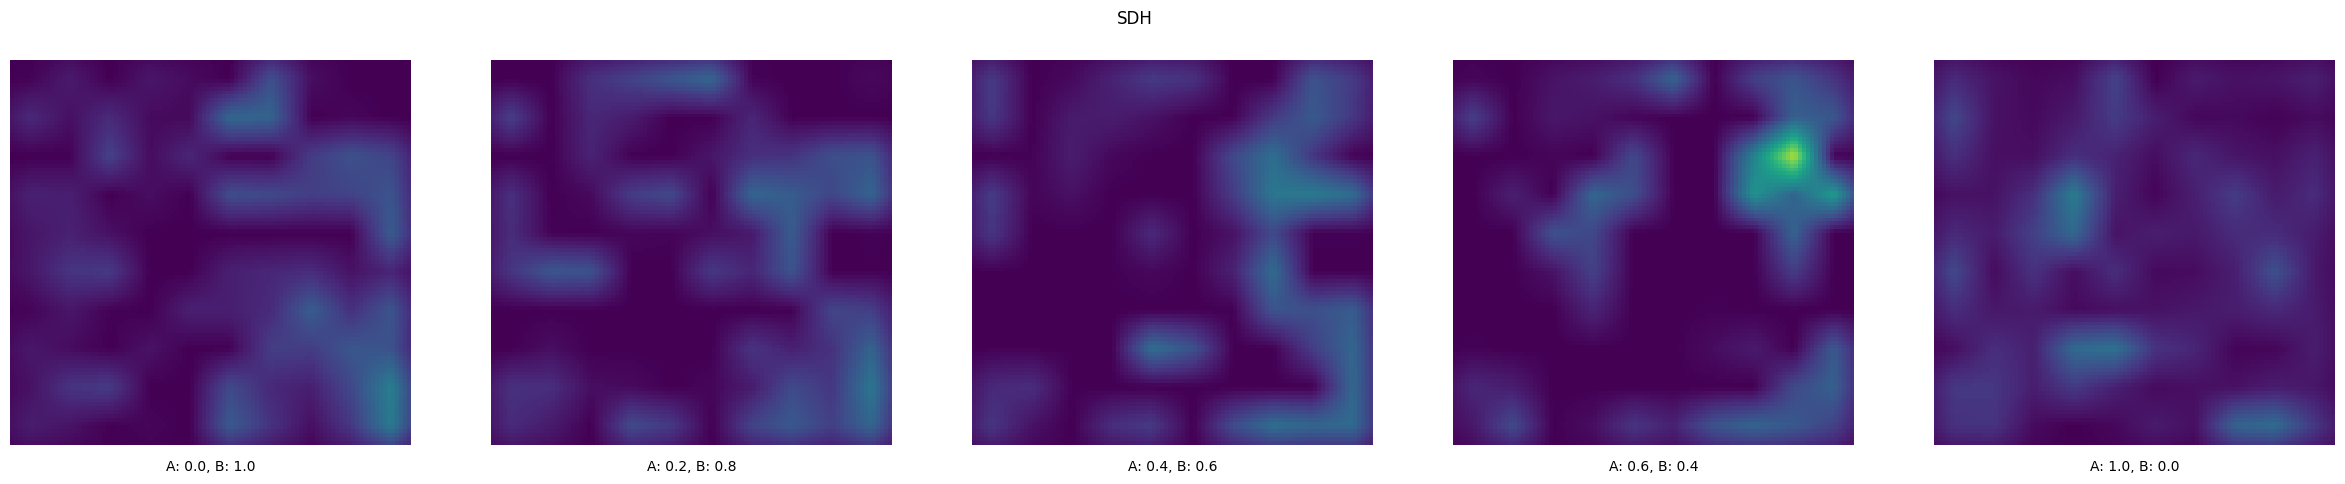

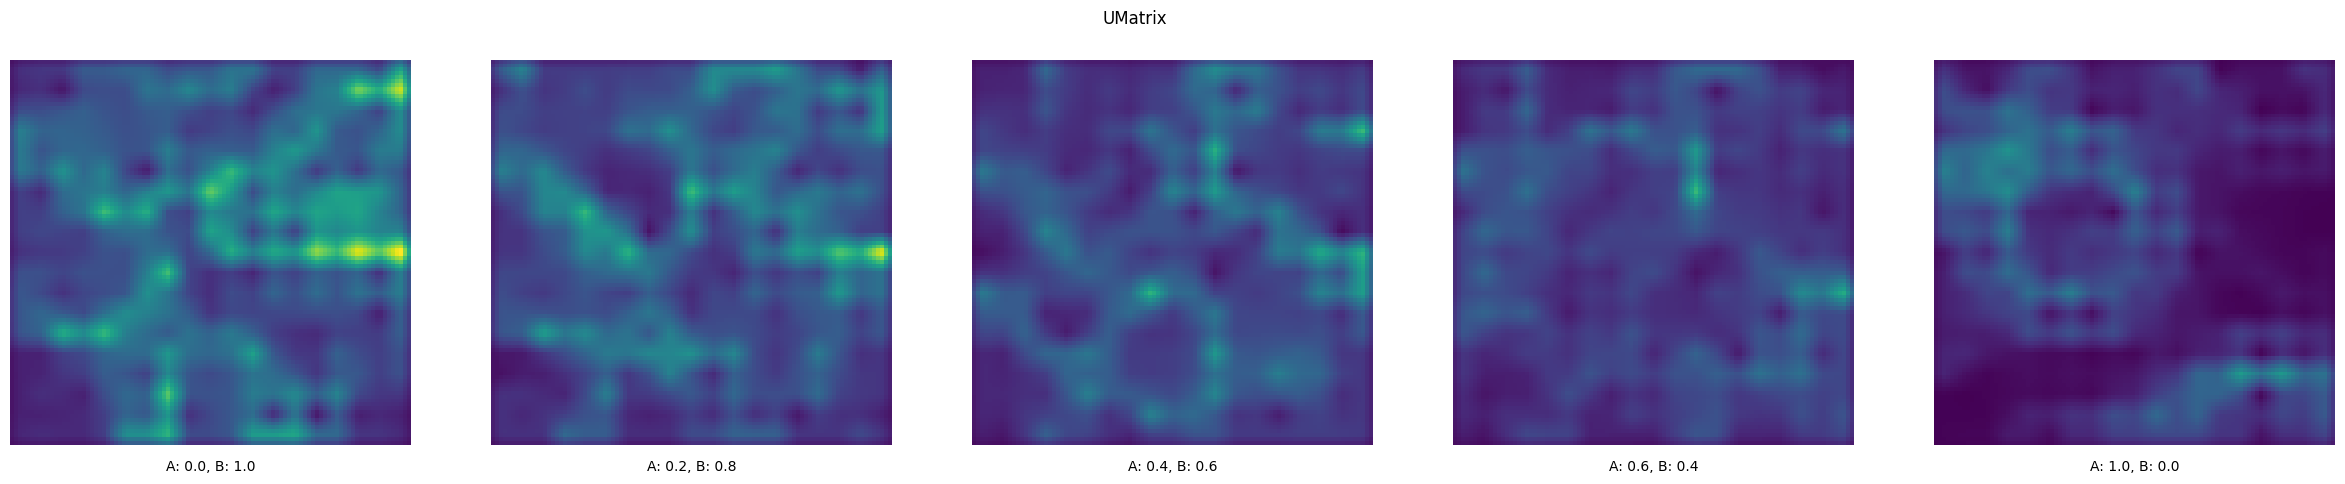

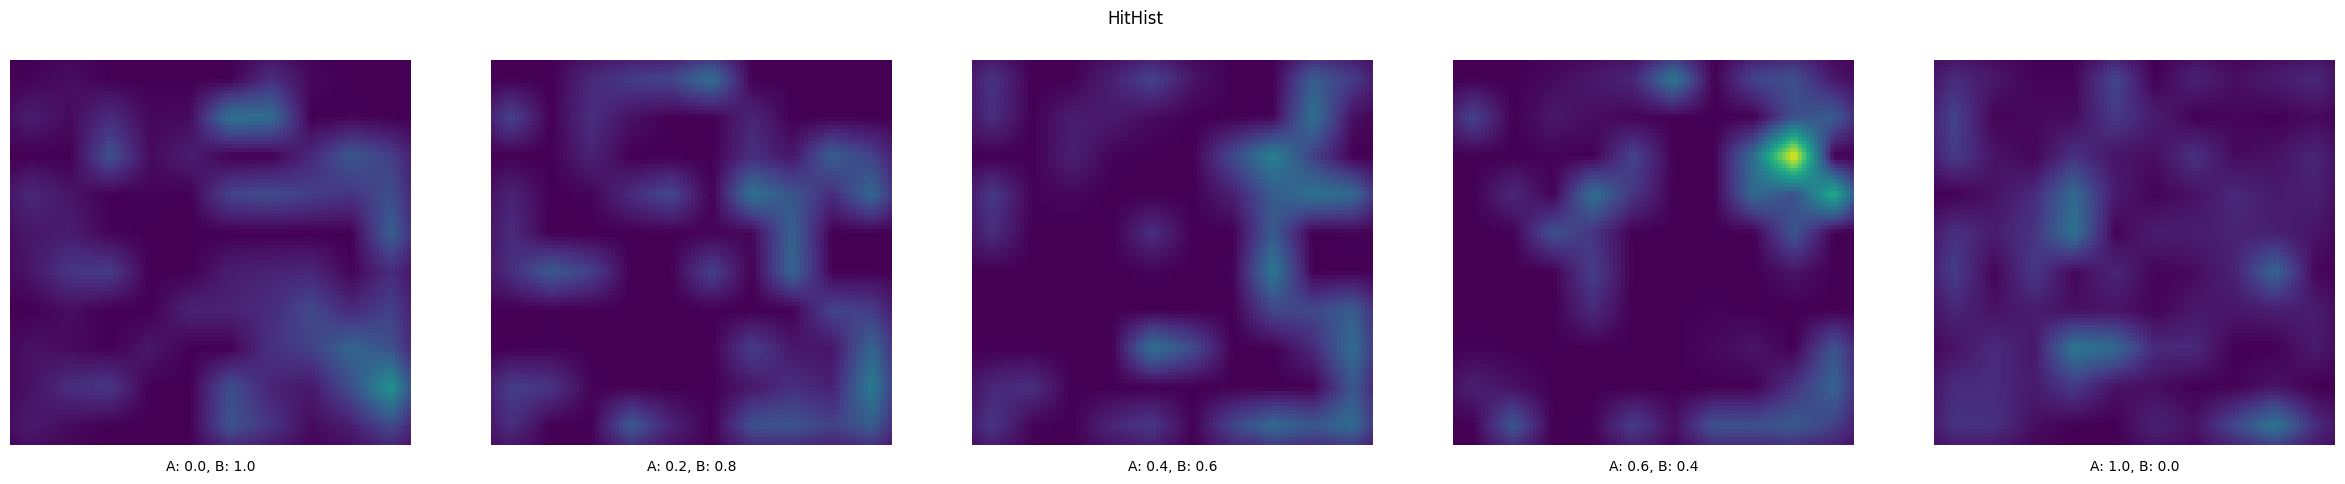

In [10]:
asom_small_6 = setup(
    som_dim=SOM_DIM,
    num_layers=6,
    aspect_selection=[0, 0, 1])

### Only Aspect A

100%|██████████| 6000/6000 [00:03<00:00, 1858.06it/s]


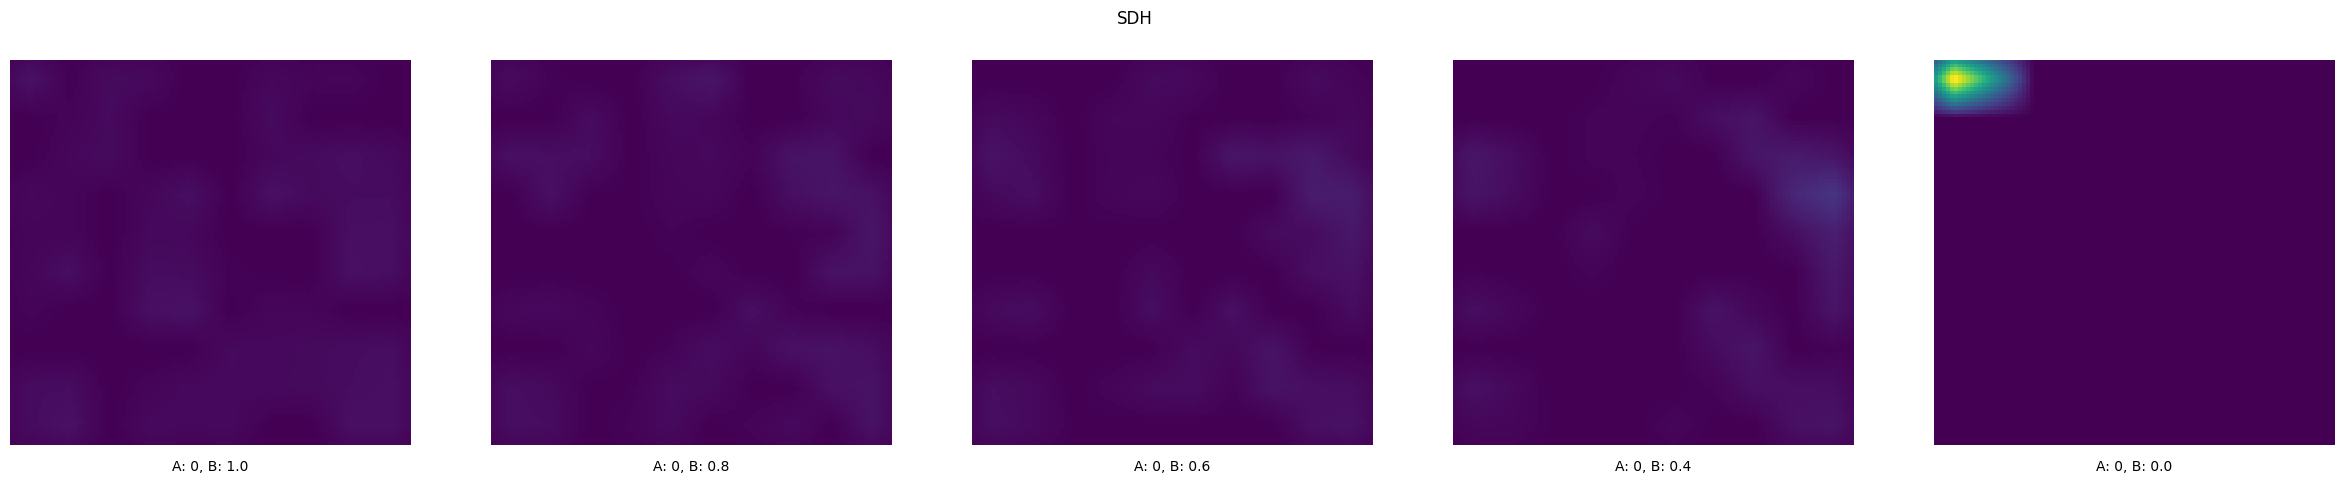

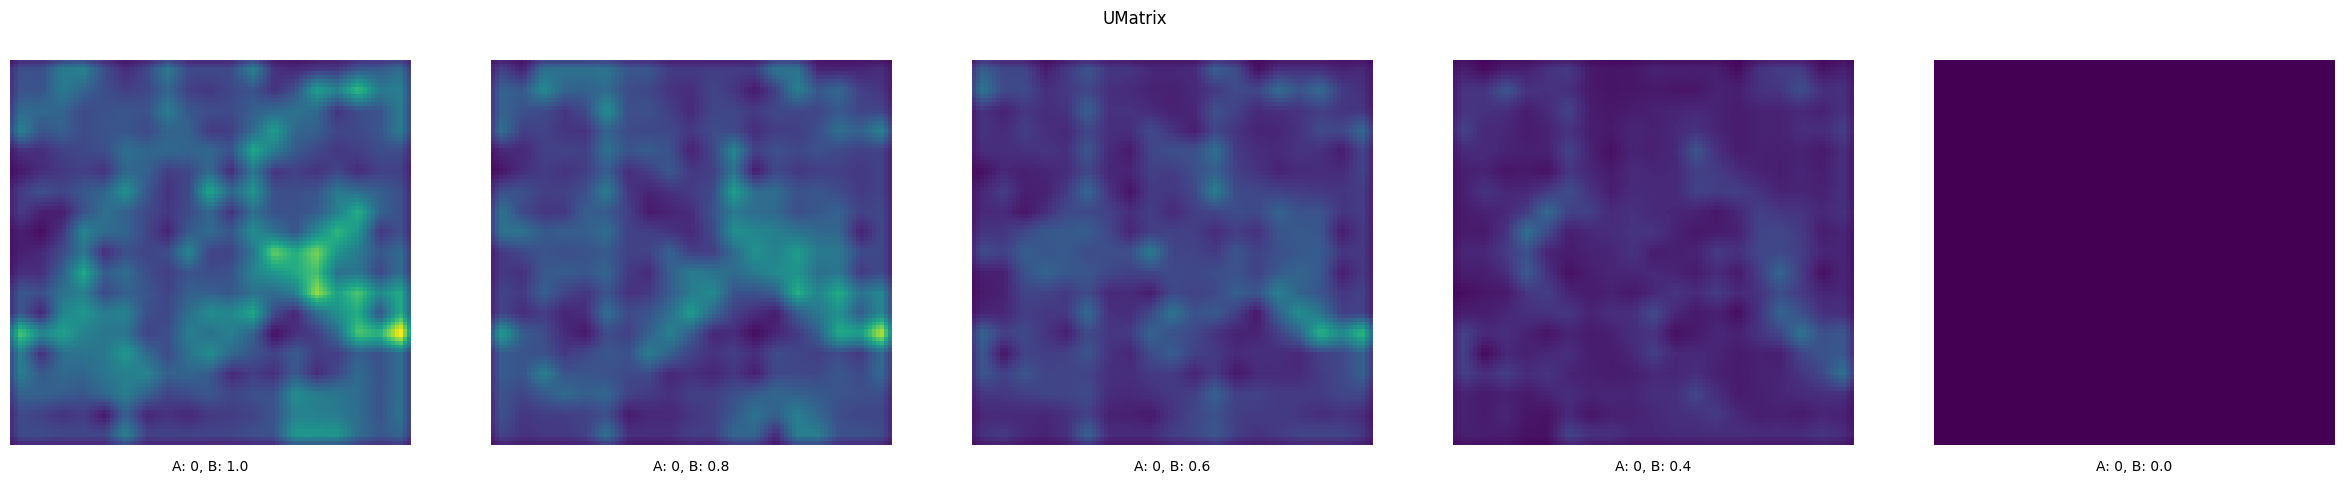

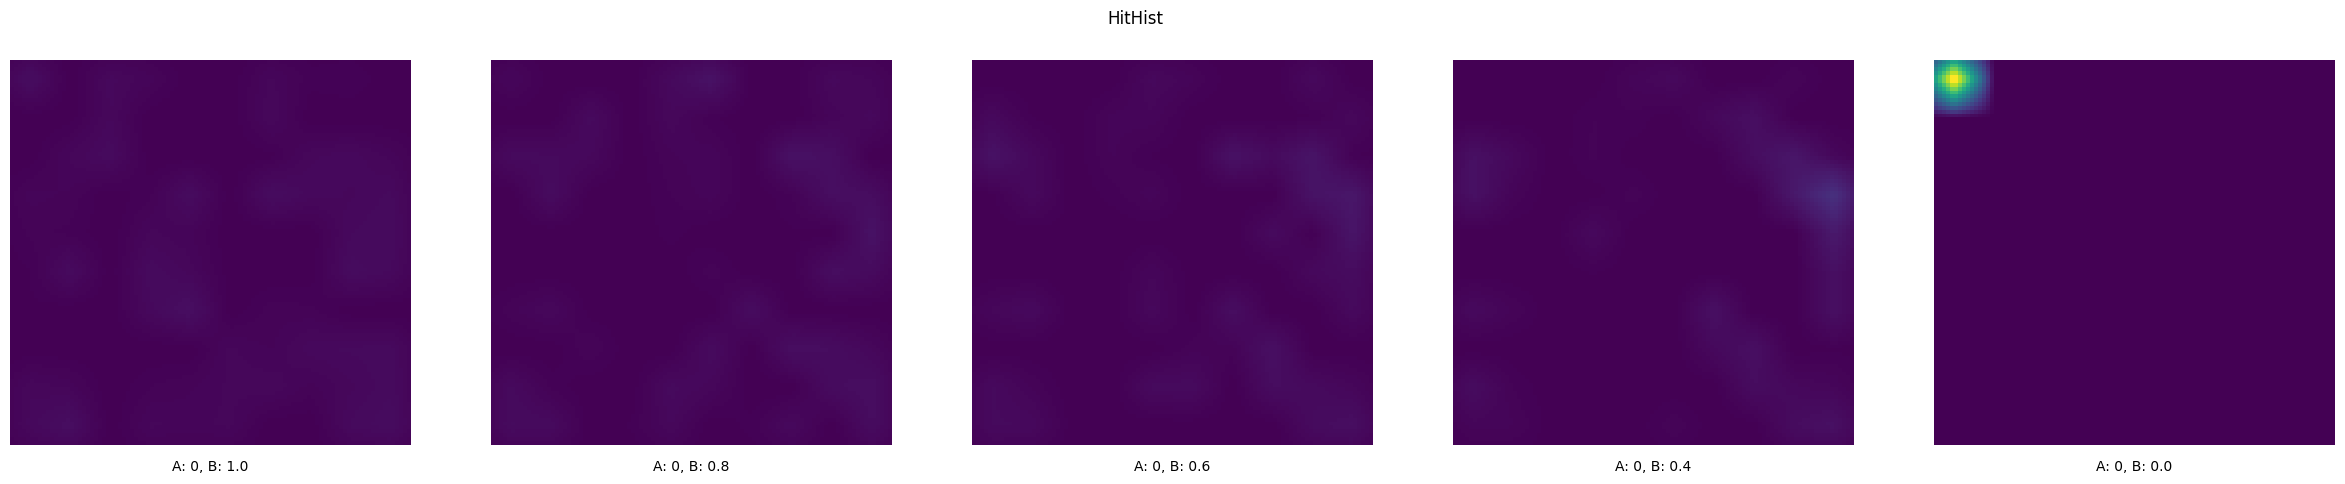

In [11]:
asom_small_7 = setup(
    som_dim=SOM_DIM,
    num_layers=6,
    aspect_selection=[0, 0, 0])

### Only Aspect  B

100%|██████████| 6000/6000 [00:03<00:00, 1670.81it/s]


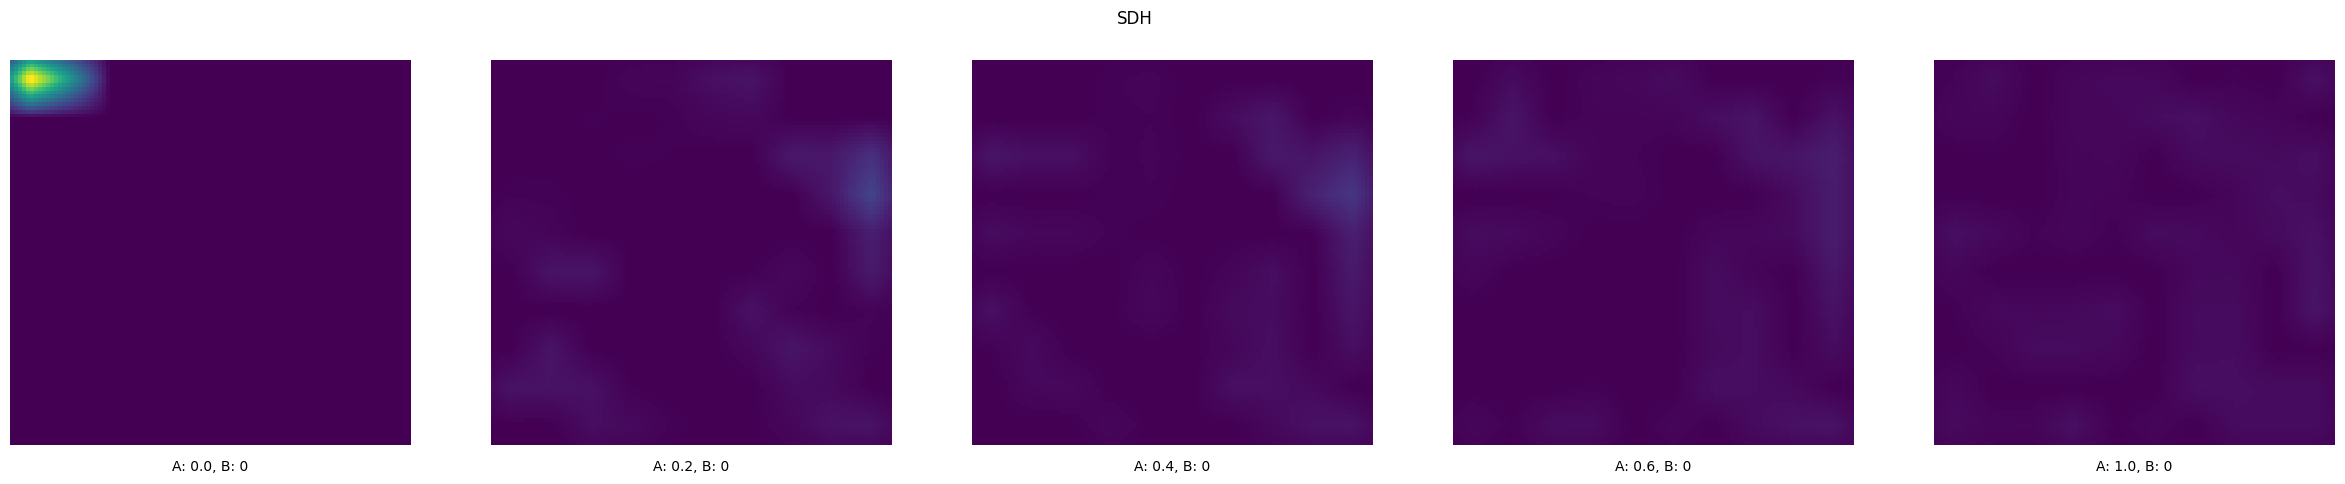

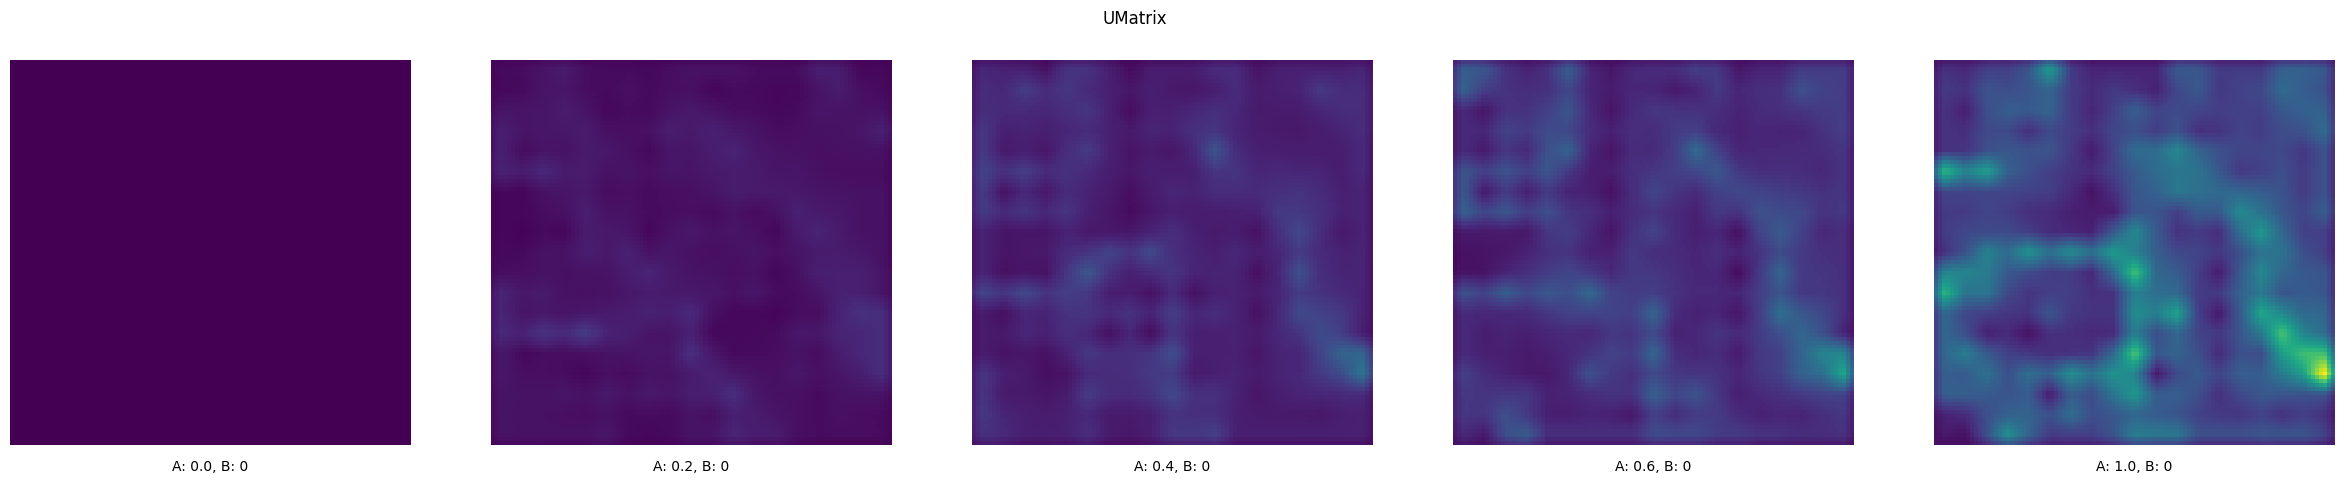

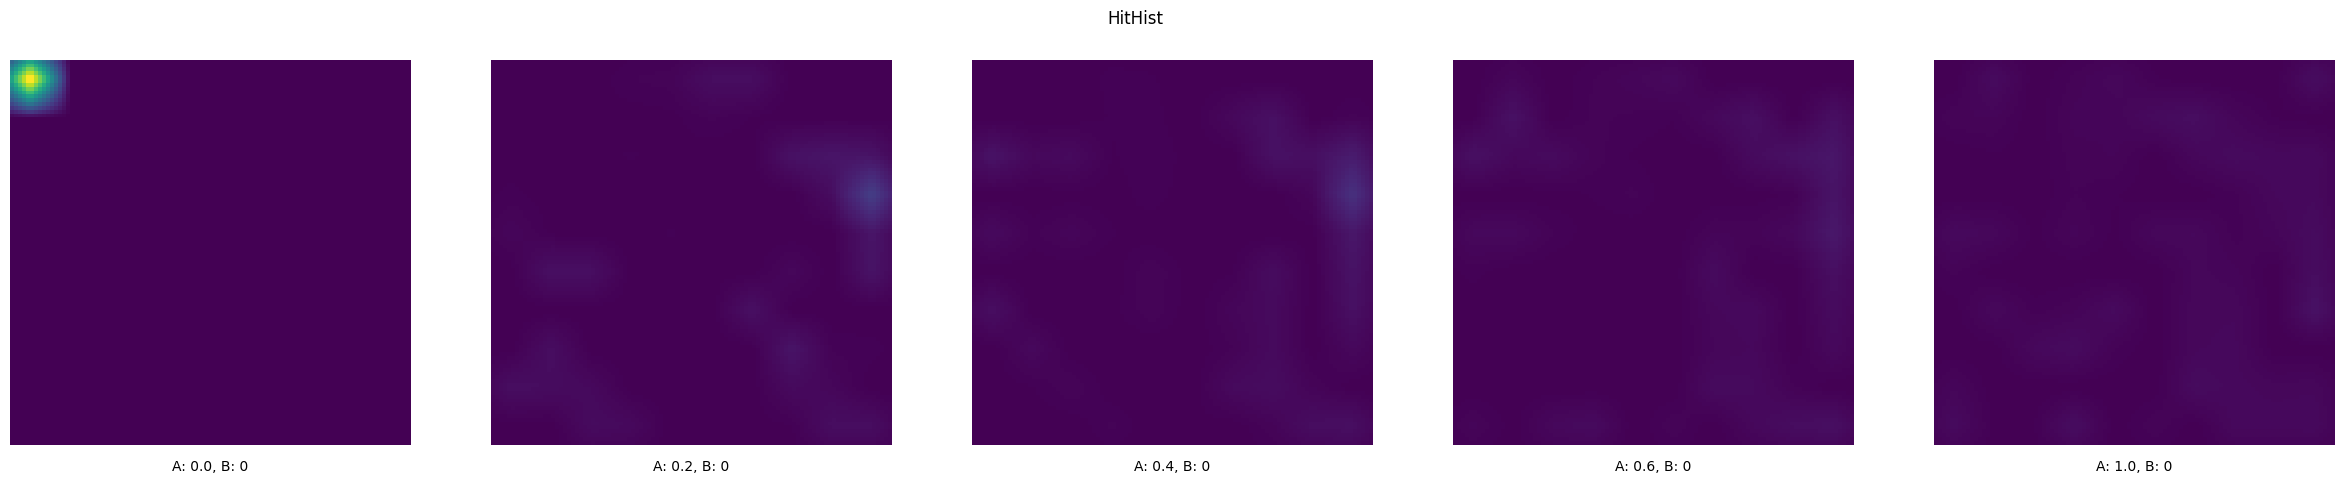

In [12]:
asom_small_8 = setup(
    som_dim=SOM_DIM,
    num_layers=6,
    aspect_selection=[1, 1, 1])

## Alignd SOMs on Chainlink 100x60 

In [13]:
SOM_DIM = (100, 60)
N_LAYERS = 31
ASPECT_SELECTION = [1, 1, 0]

### Default Setup

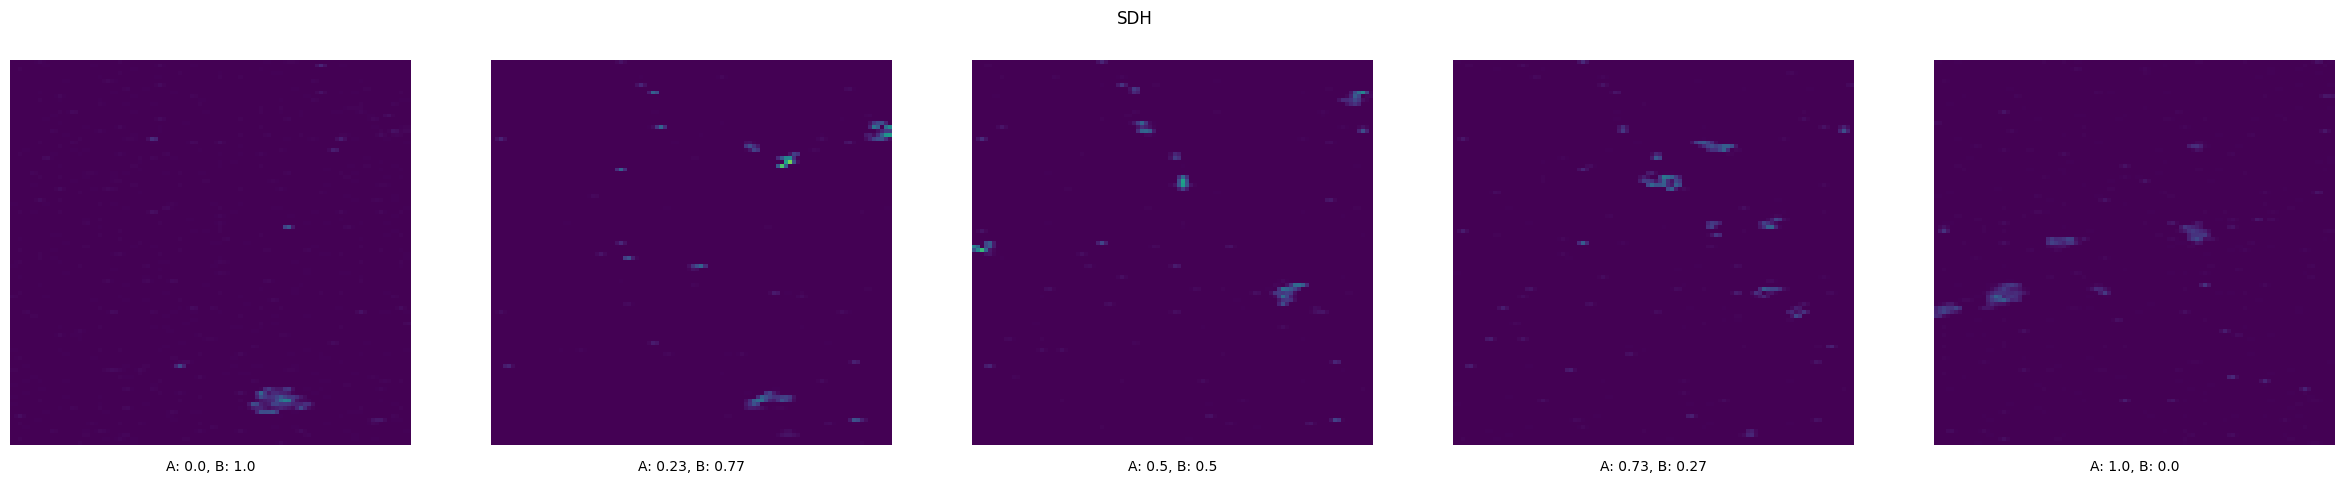

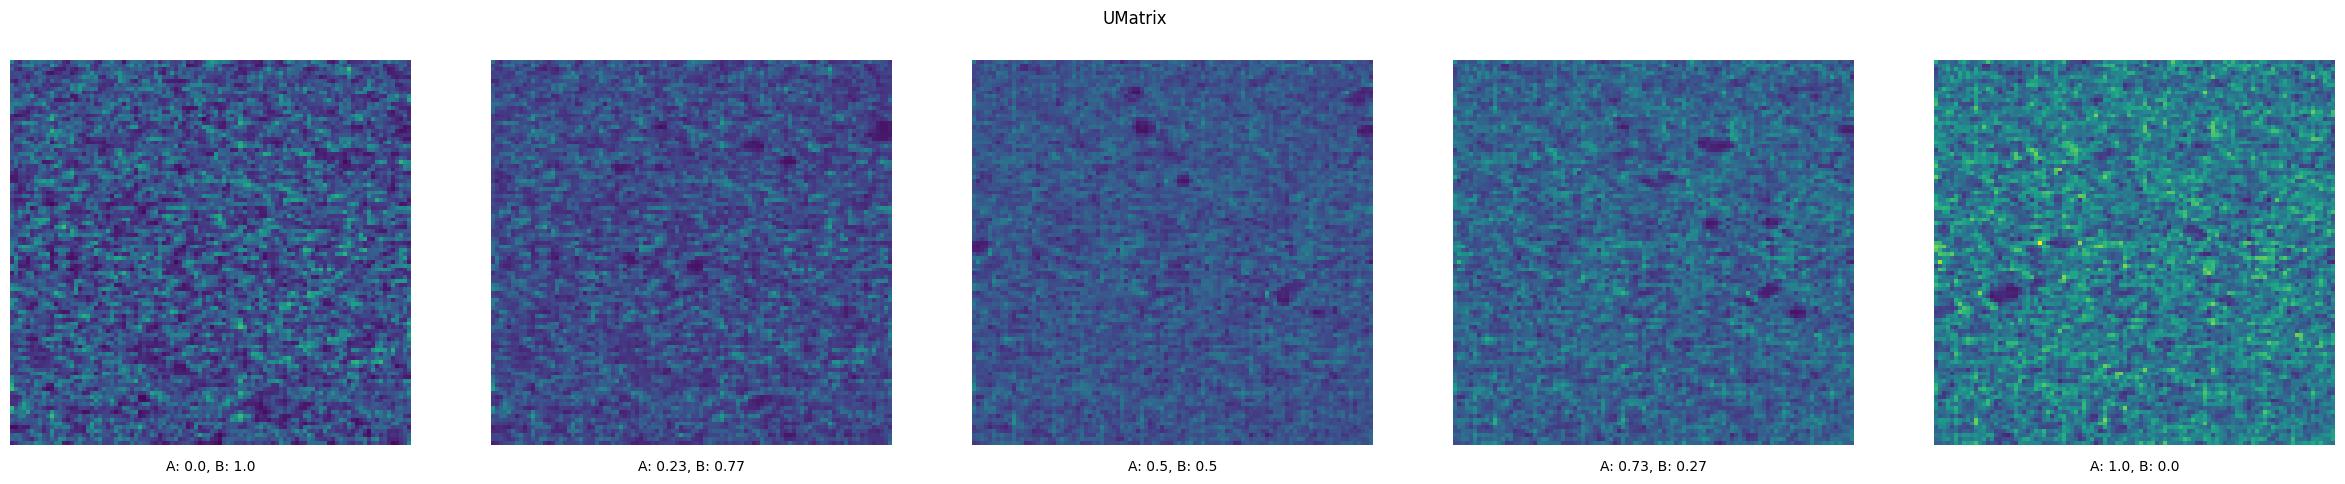

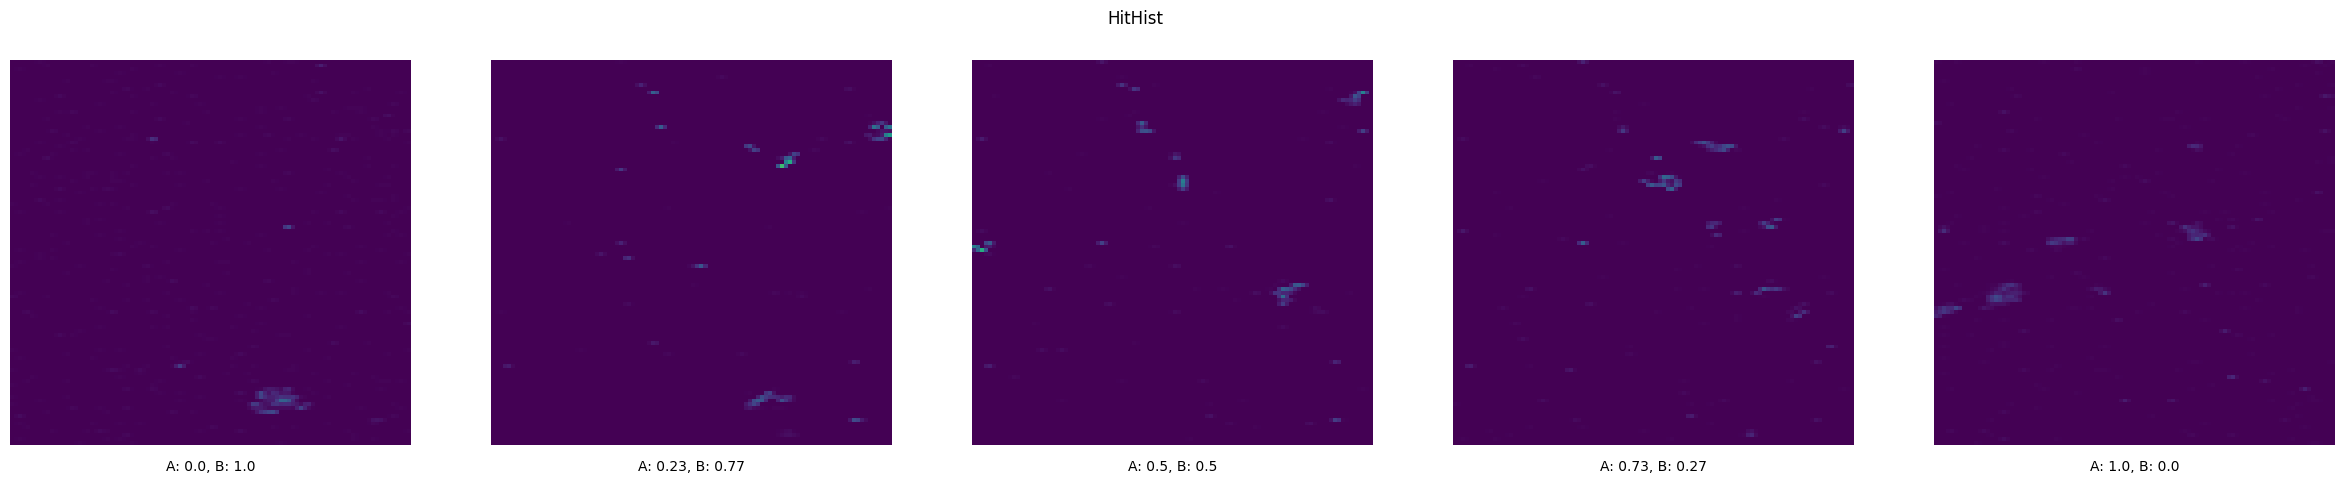

In [15]:
asom_large_1 = setup(
    som_dim=SOM_DIM,
    num_layers=N_LAYERS,
    aspect_selection=ASPECT_SELECTION)

### Many In-Between Layers

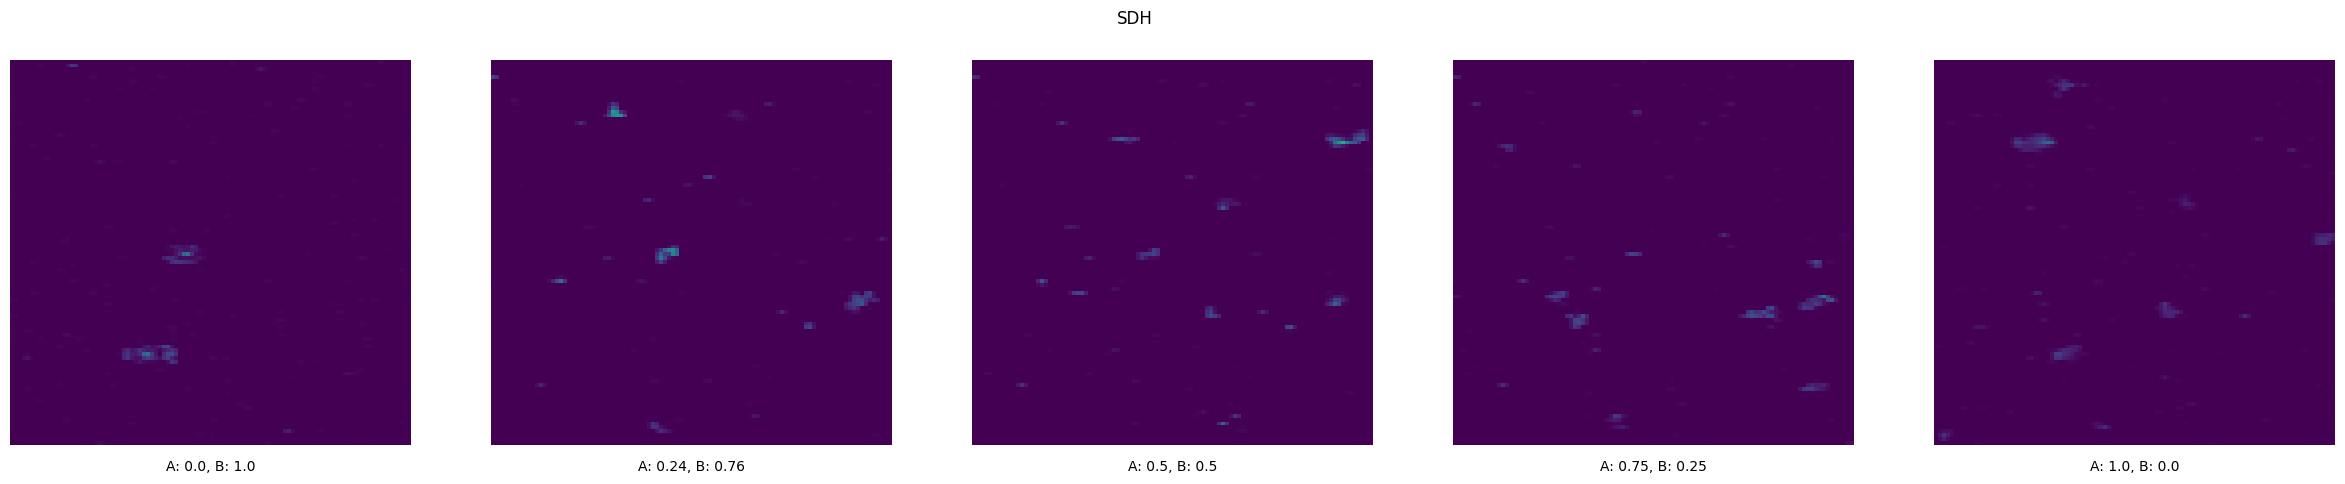

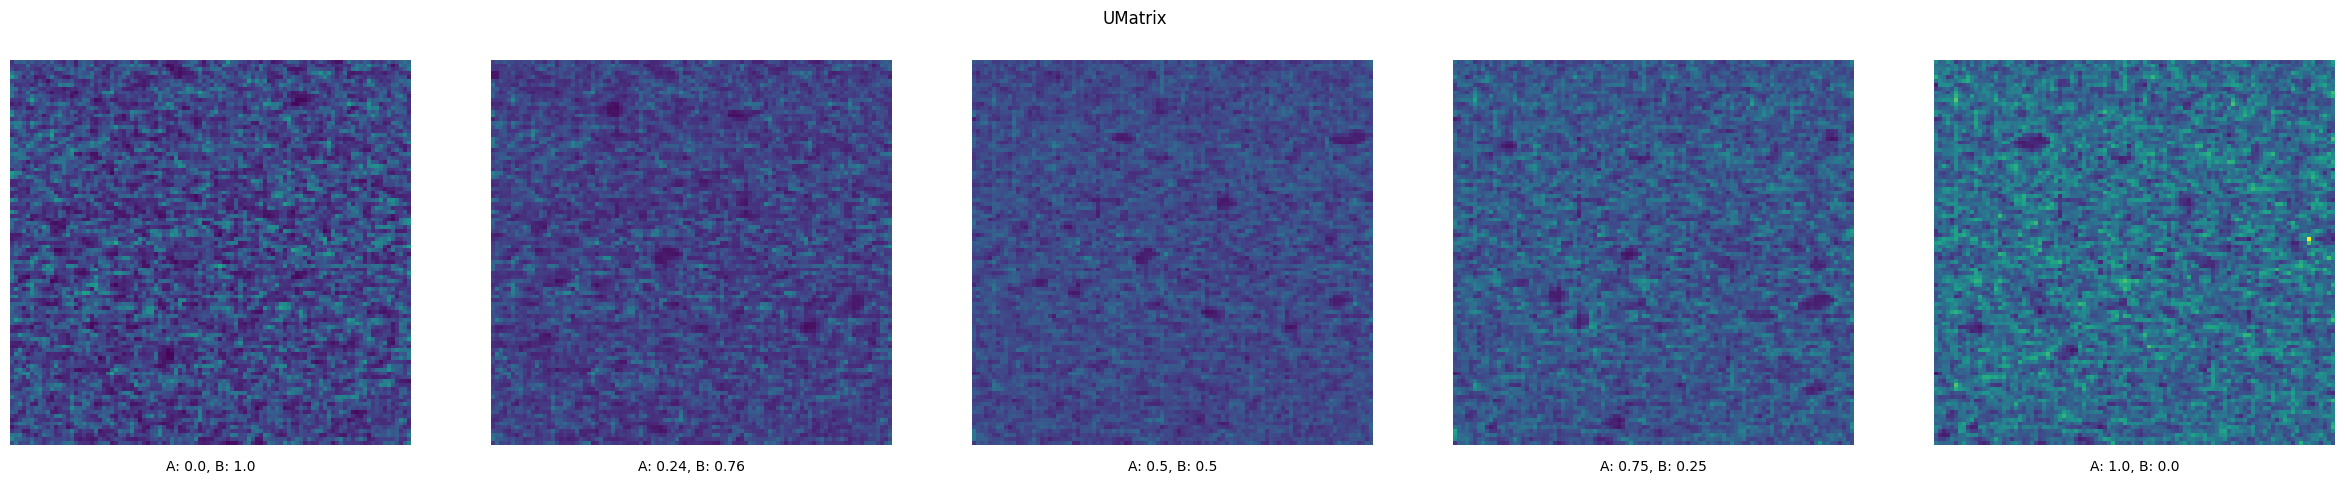

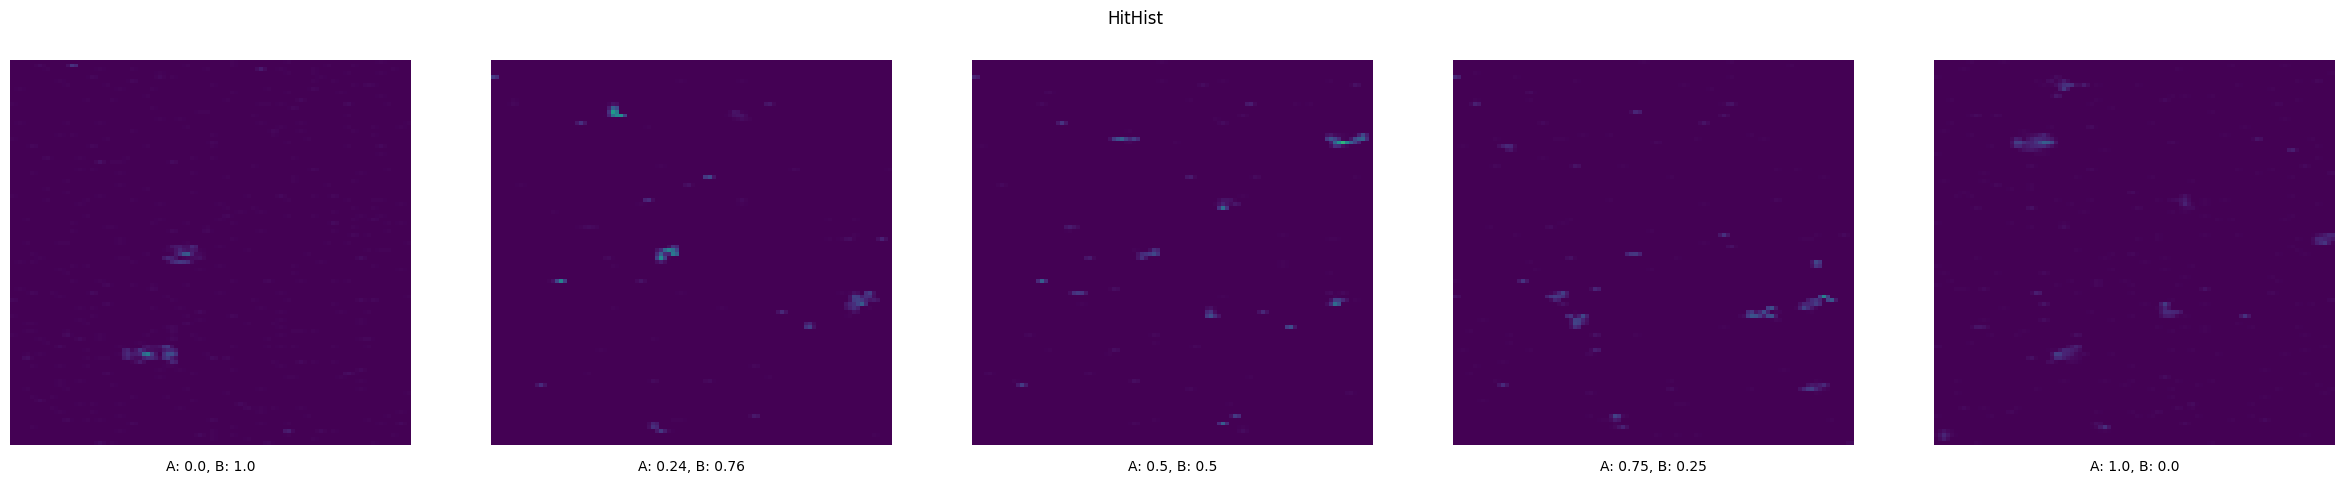

In [17]:
asom_large_2 = setup(
    som_dim=SOM_DIM,
    num_layers=128,
    aspect_selection=ASPECT_SELECTION)

### Strong Layer-Wise Coupling

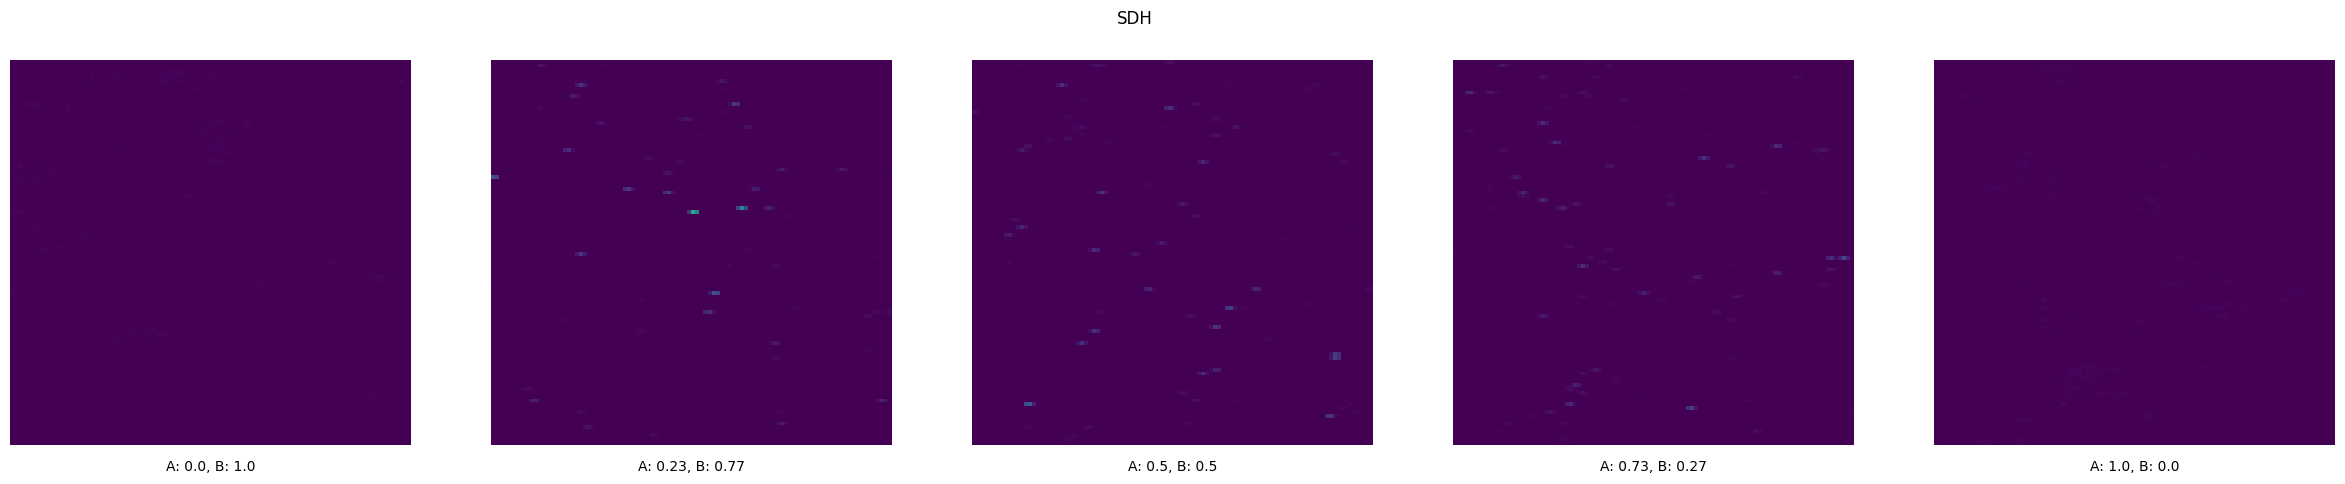

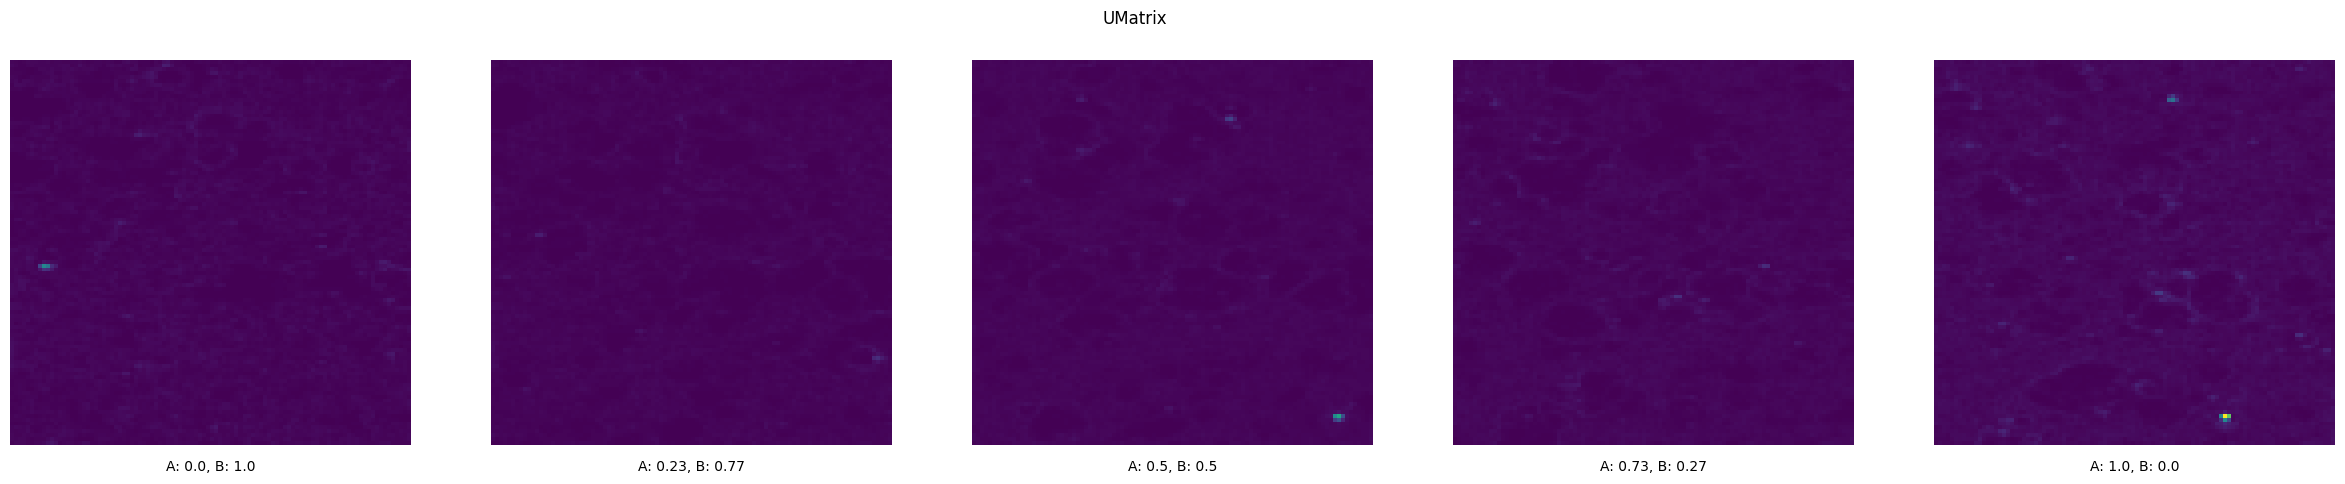

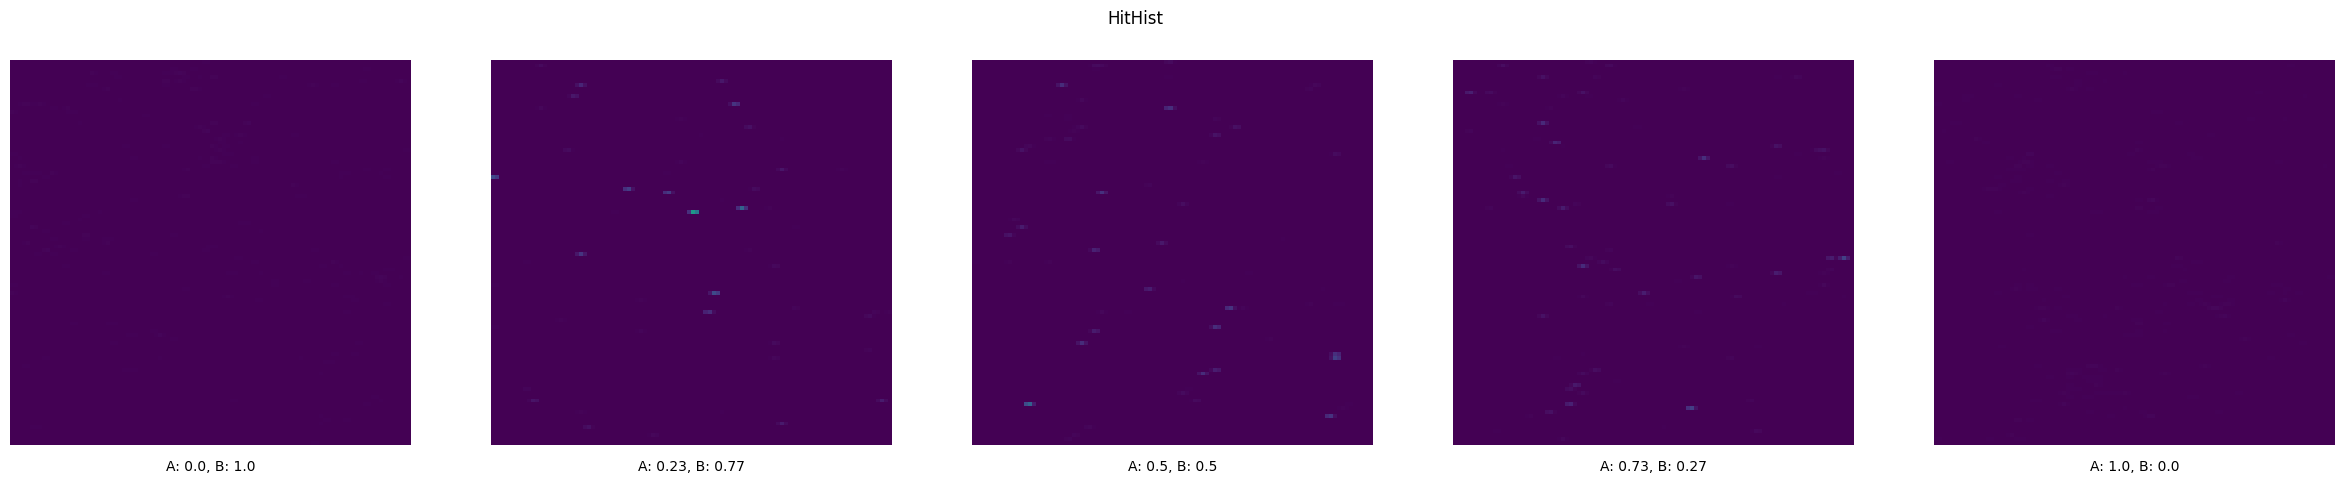

In [19]:
asom_large_3 = setup(
    som_dim=SOM_DIM,
    num_layers=N_LAYERS,
    aspect_selection=ASPECT_SELECTION,
    layer_distance_ratio=10)


### Weak Layer-Wise Coupling

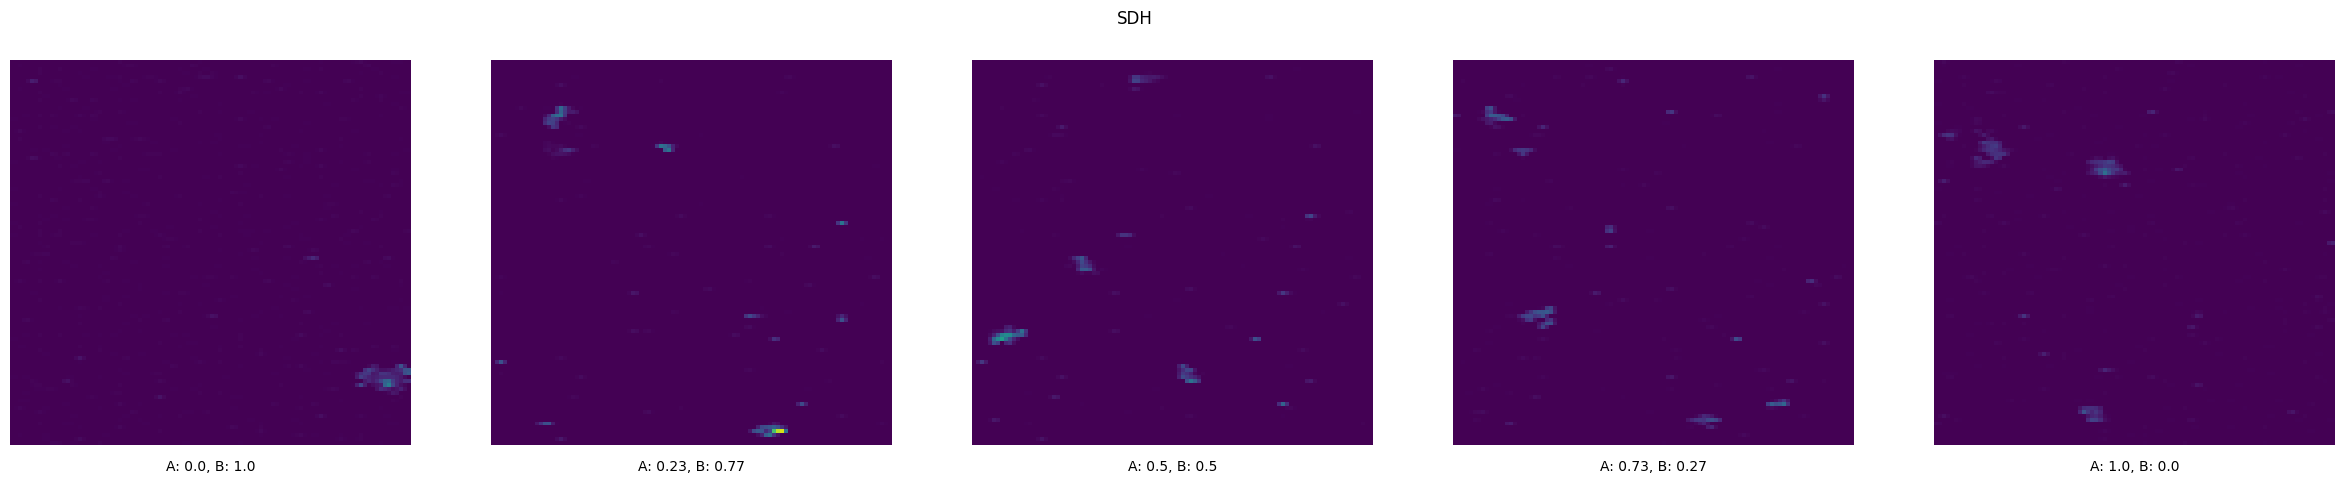

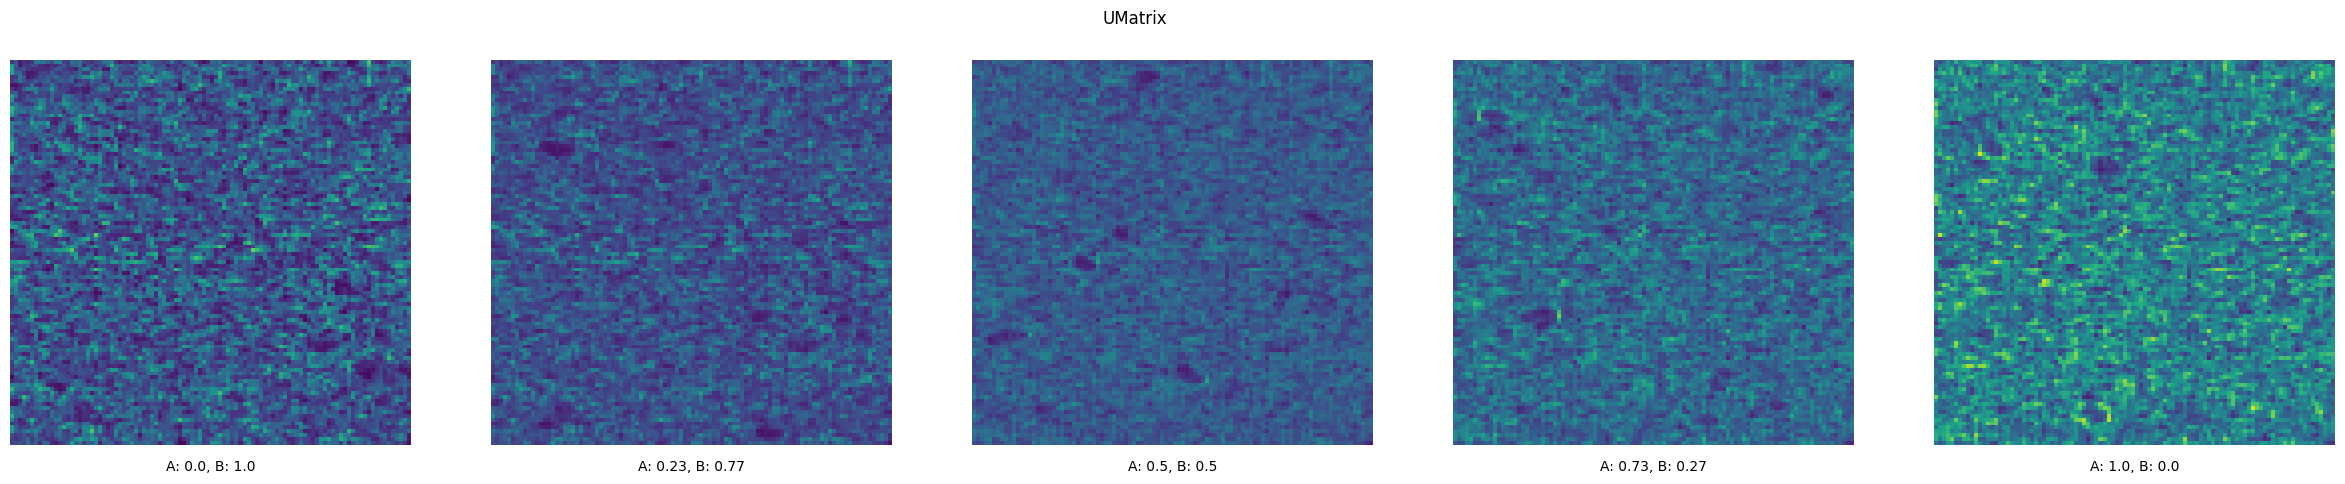

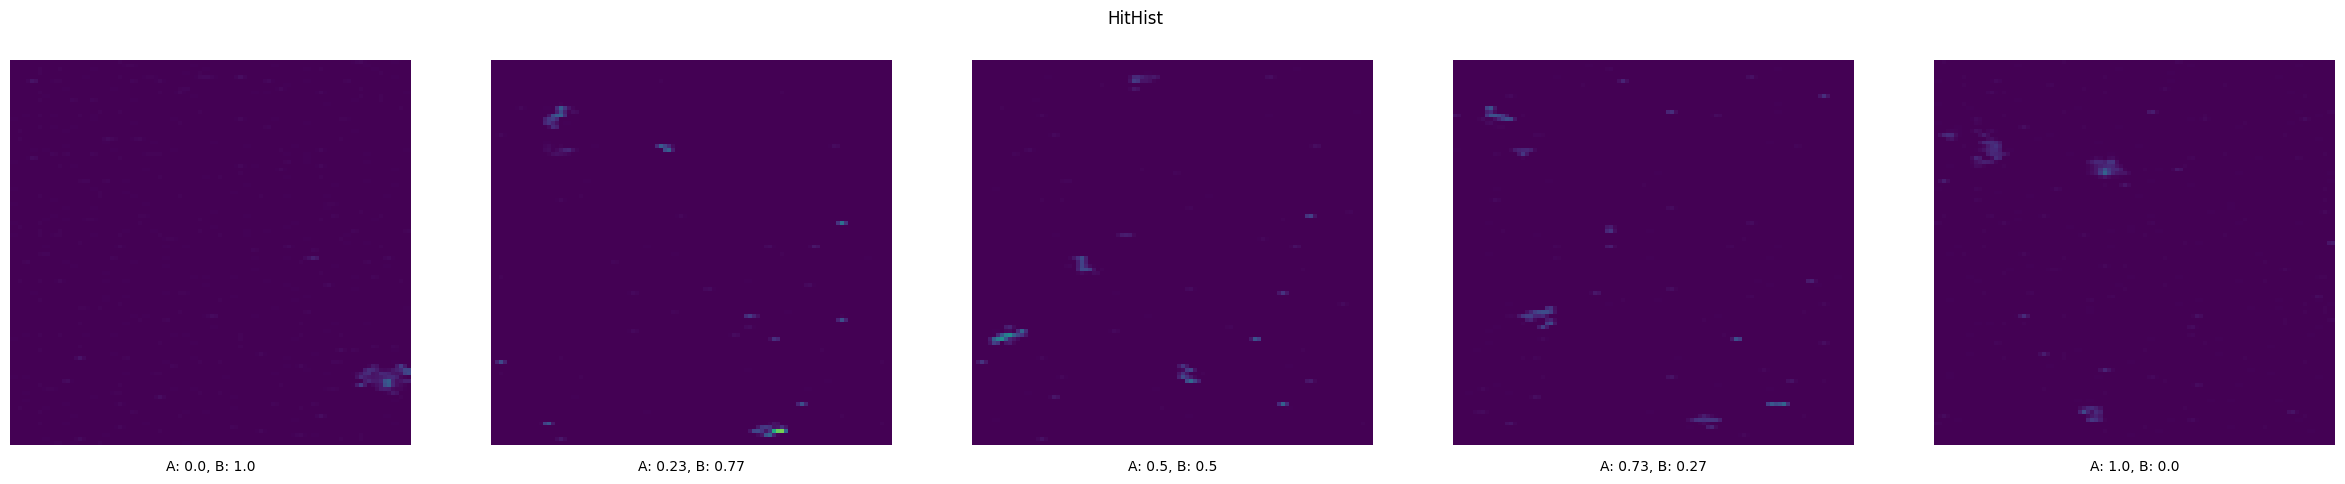

In [21]:
asom_large_4 = setup(
    som_dim=SOM_DIM,
    num_layers=N_LAYERS,
    aspect_selection=ASPECT_SELECTION,
    layer_distance_ratio=1e-3)

### Few In-Between Layers

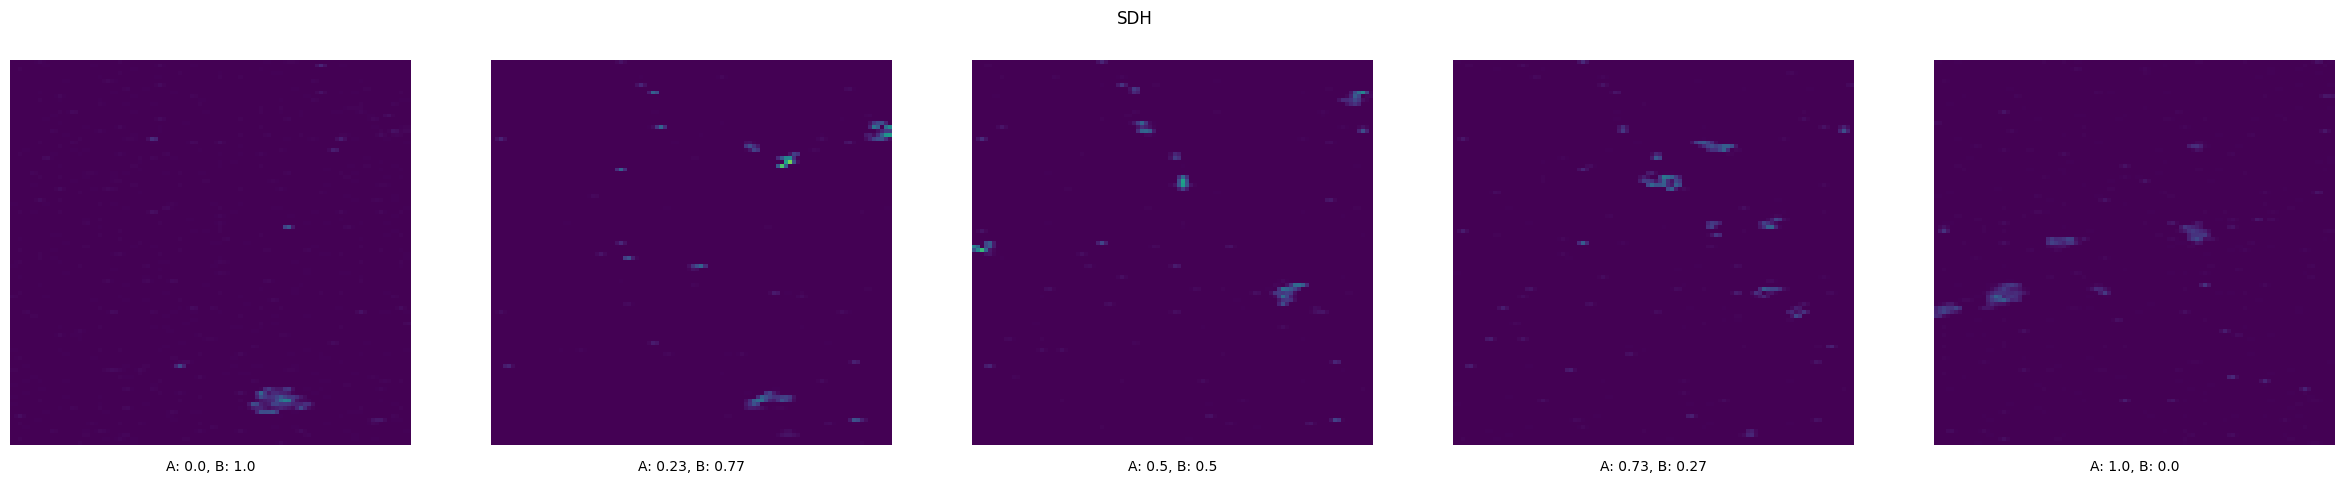

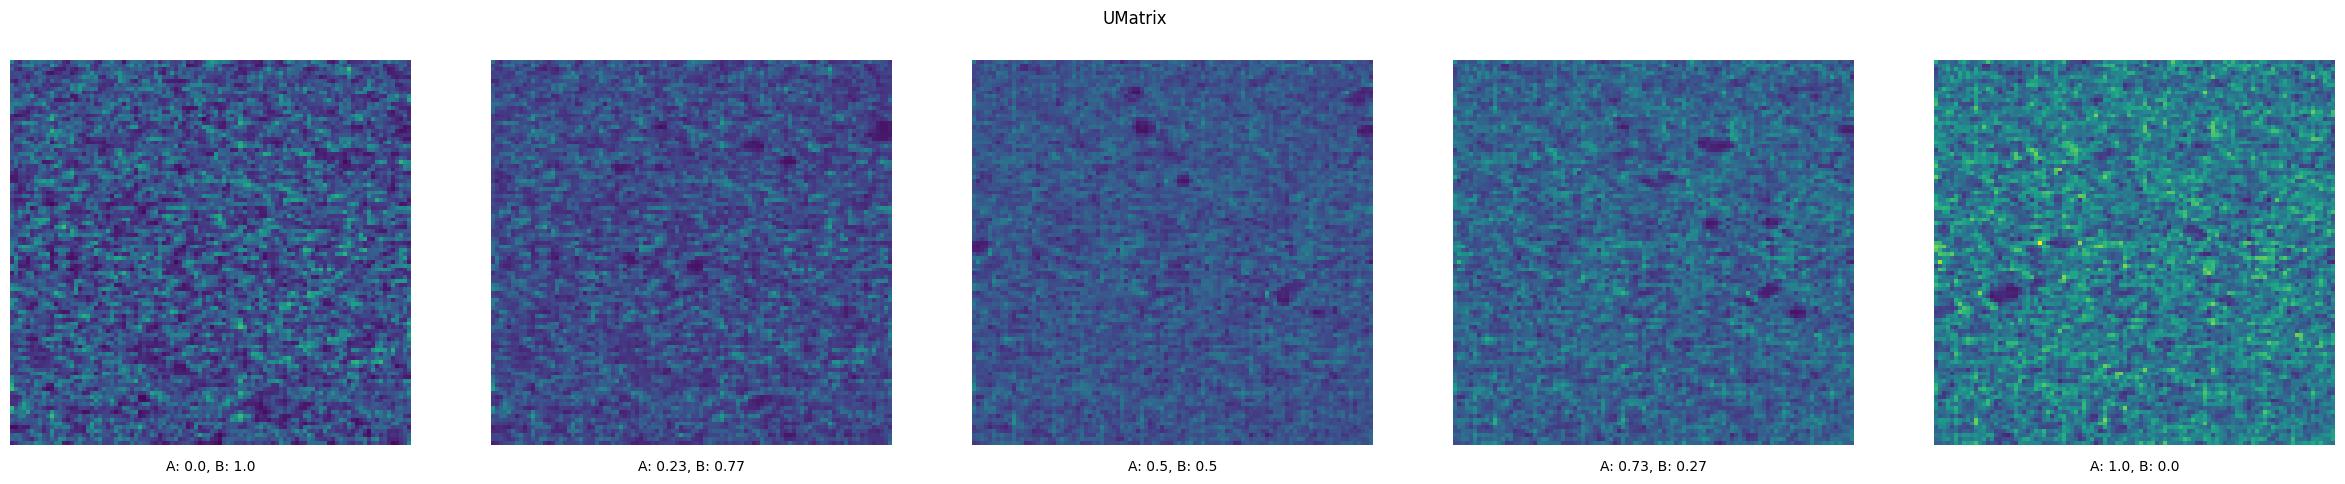

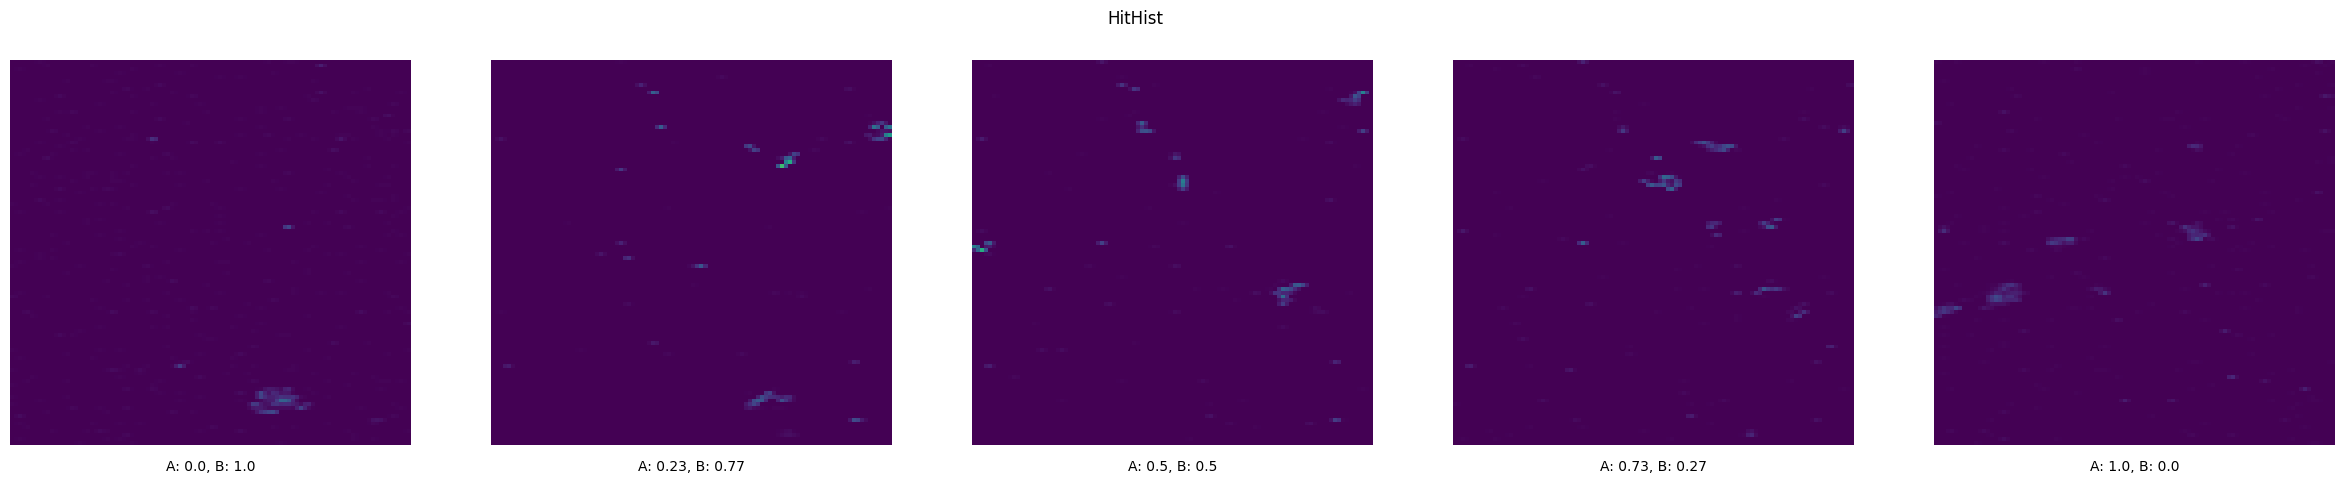

In [24]:
asom_large_5 = setup(
    som_dim=SOM_DIM,
    num_layers=N_LAYERS,
    aspect_selection=ASPECT_SELECTION)

### Switch Aspect Indices

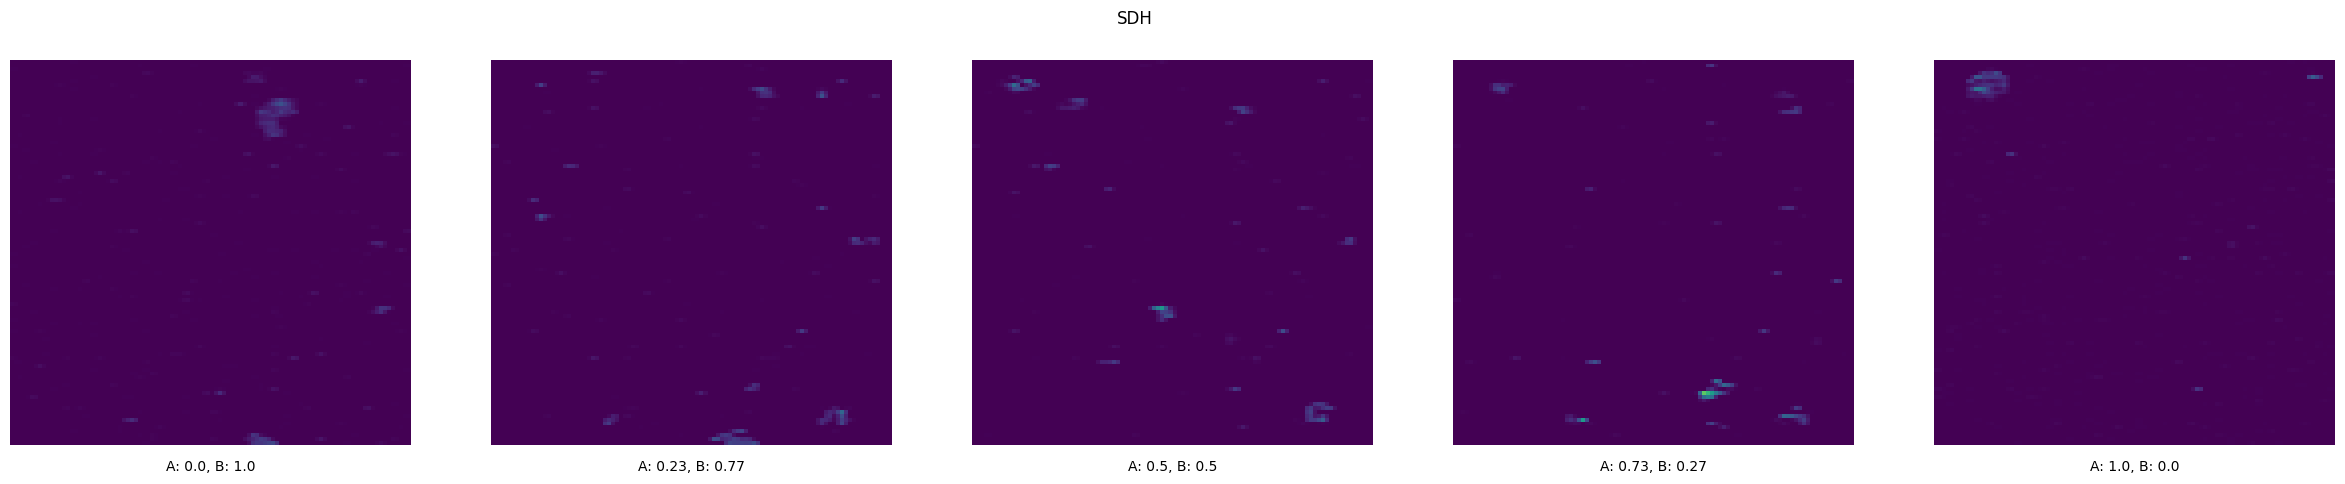

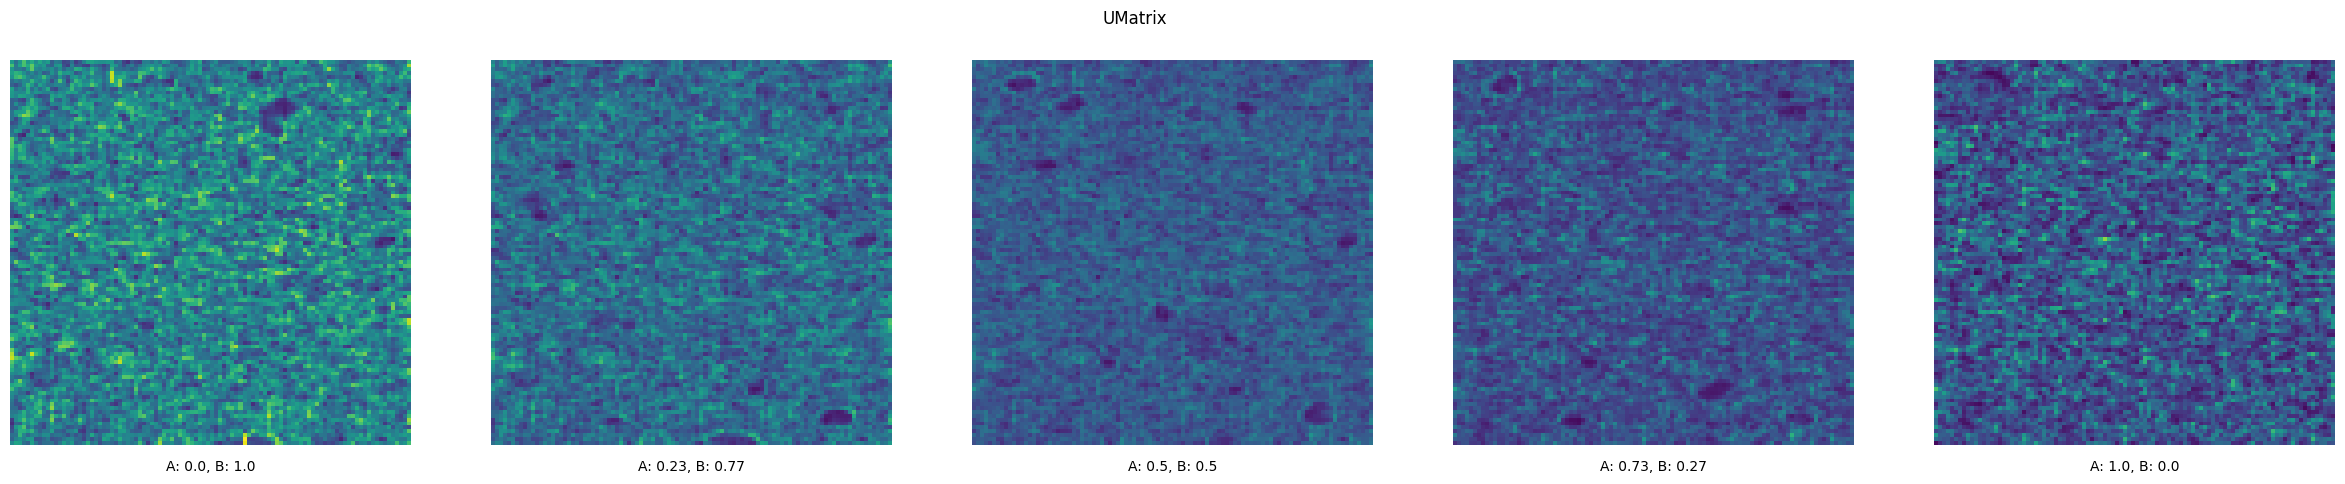

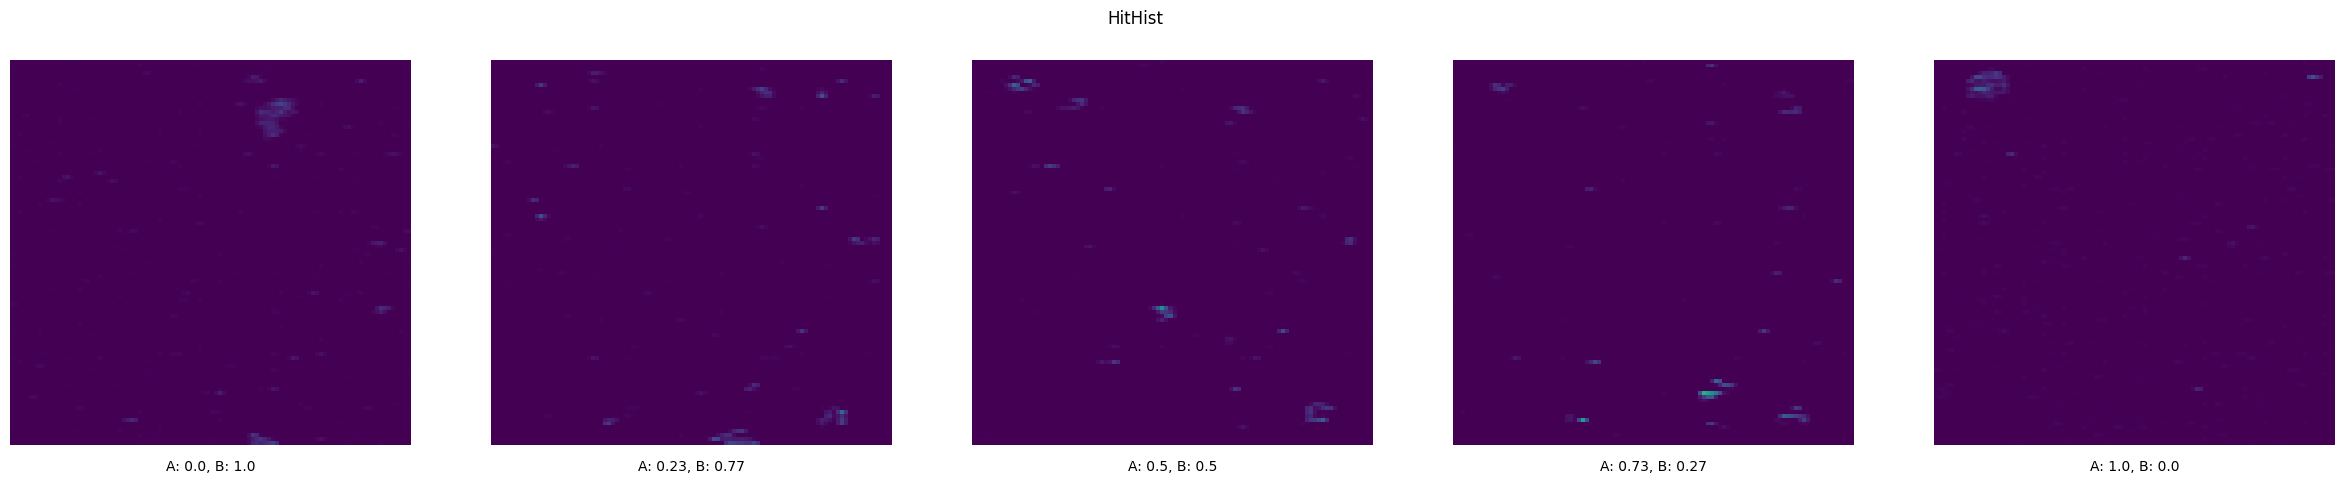

In [26]:
asom_large_6 = setup(
    som_dim=SOM_DIM,
    num_layers=N_LAYERS,
    aspect_selection=[0, 0, 1])

### Only Aspect B

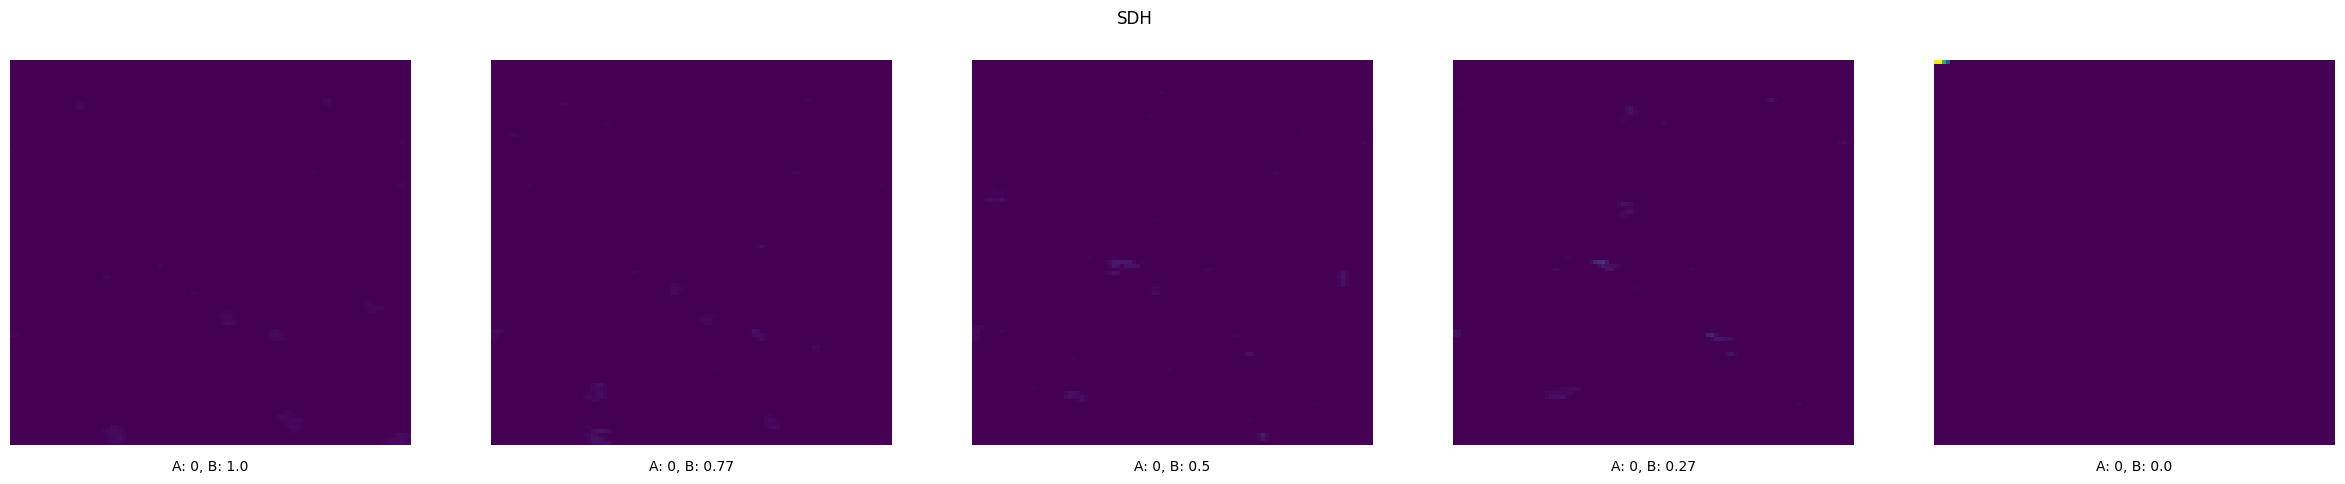

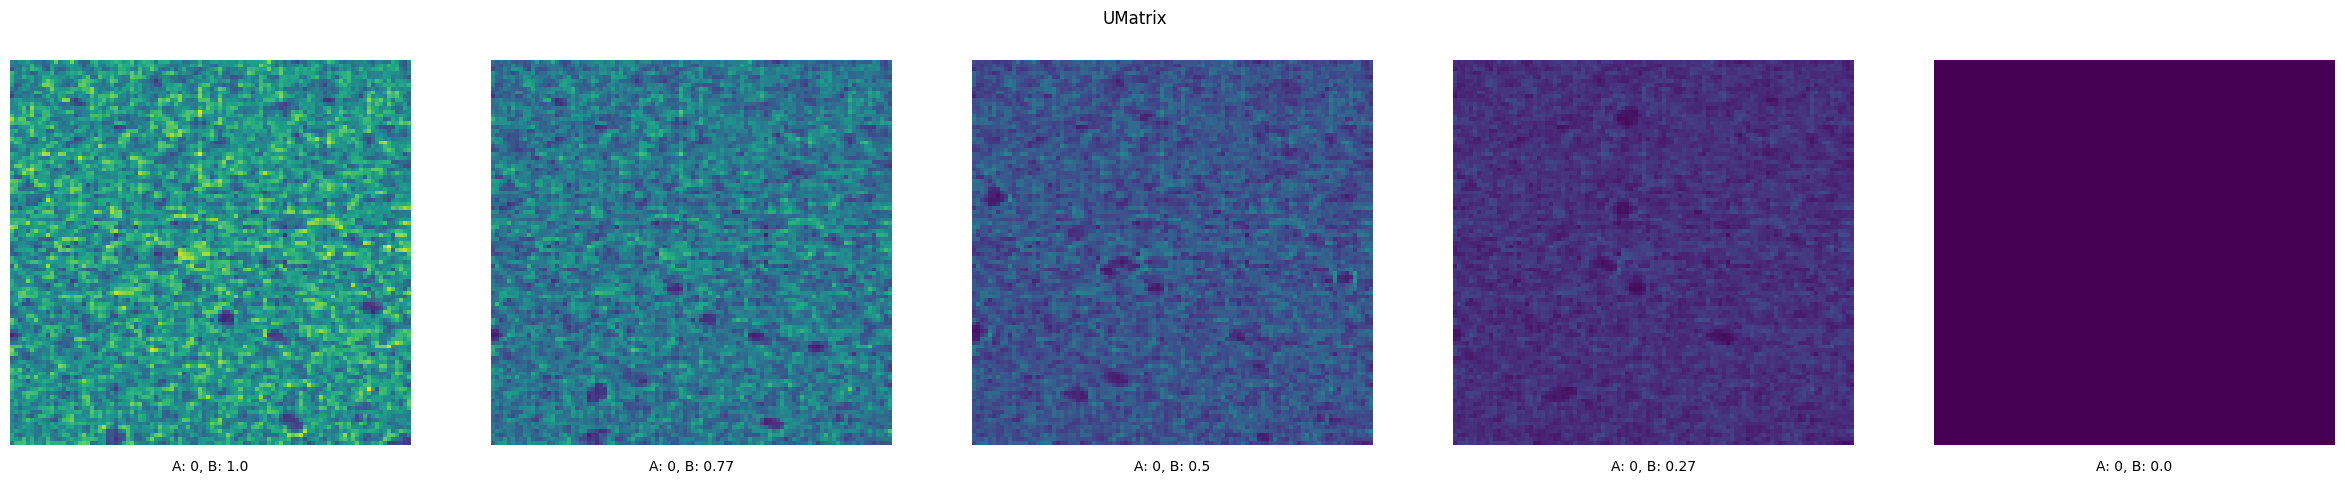

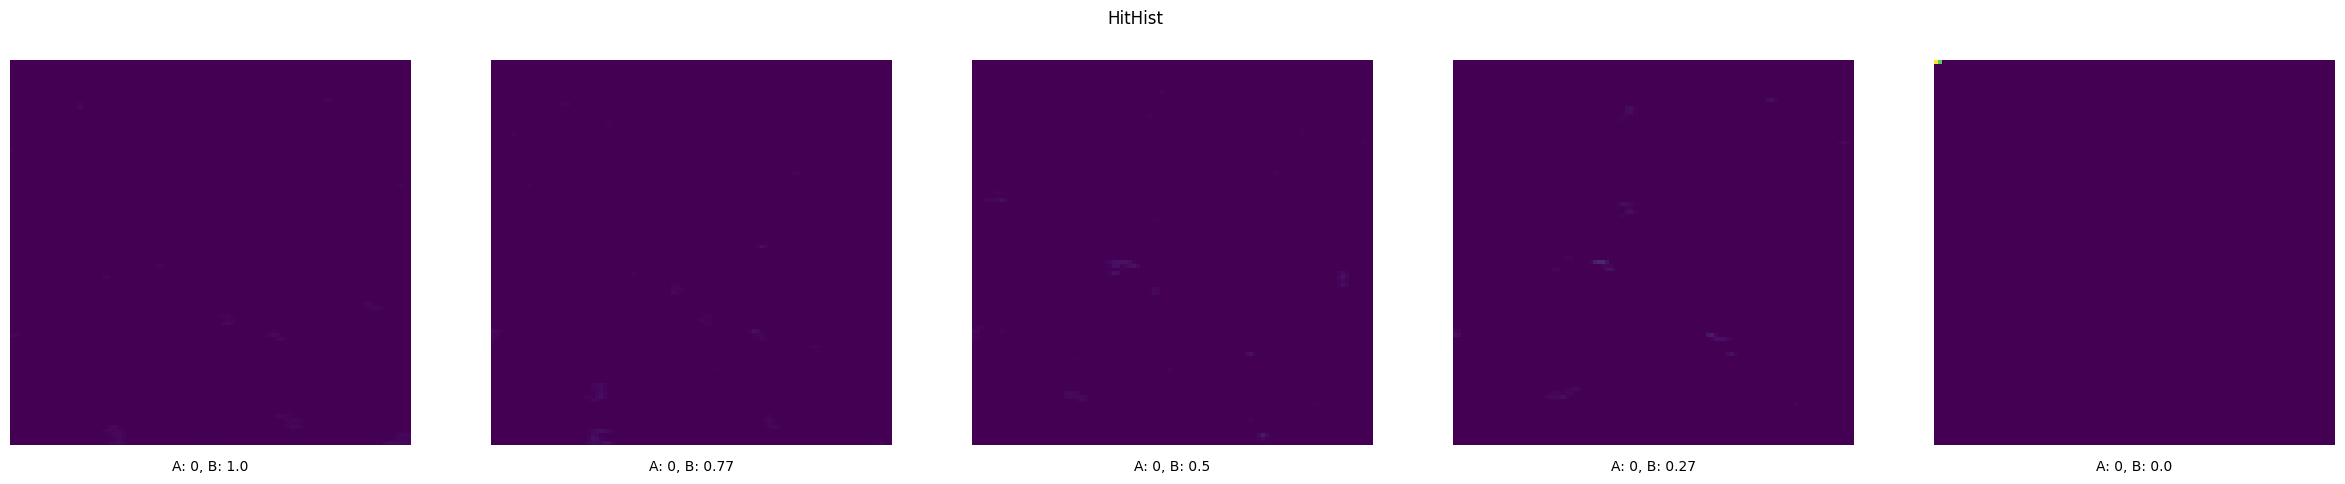

In [27]:
asom_large_7 = setup(
    som_dim=SOM_DIM,
    num_layers=N_LAYERS,
    aspect_selection=[0, 0, 0])

### Only Aspect  A

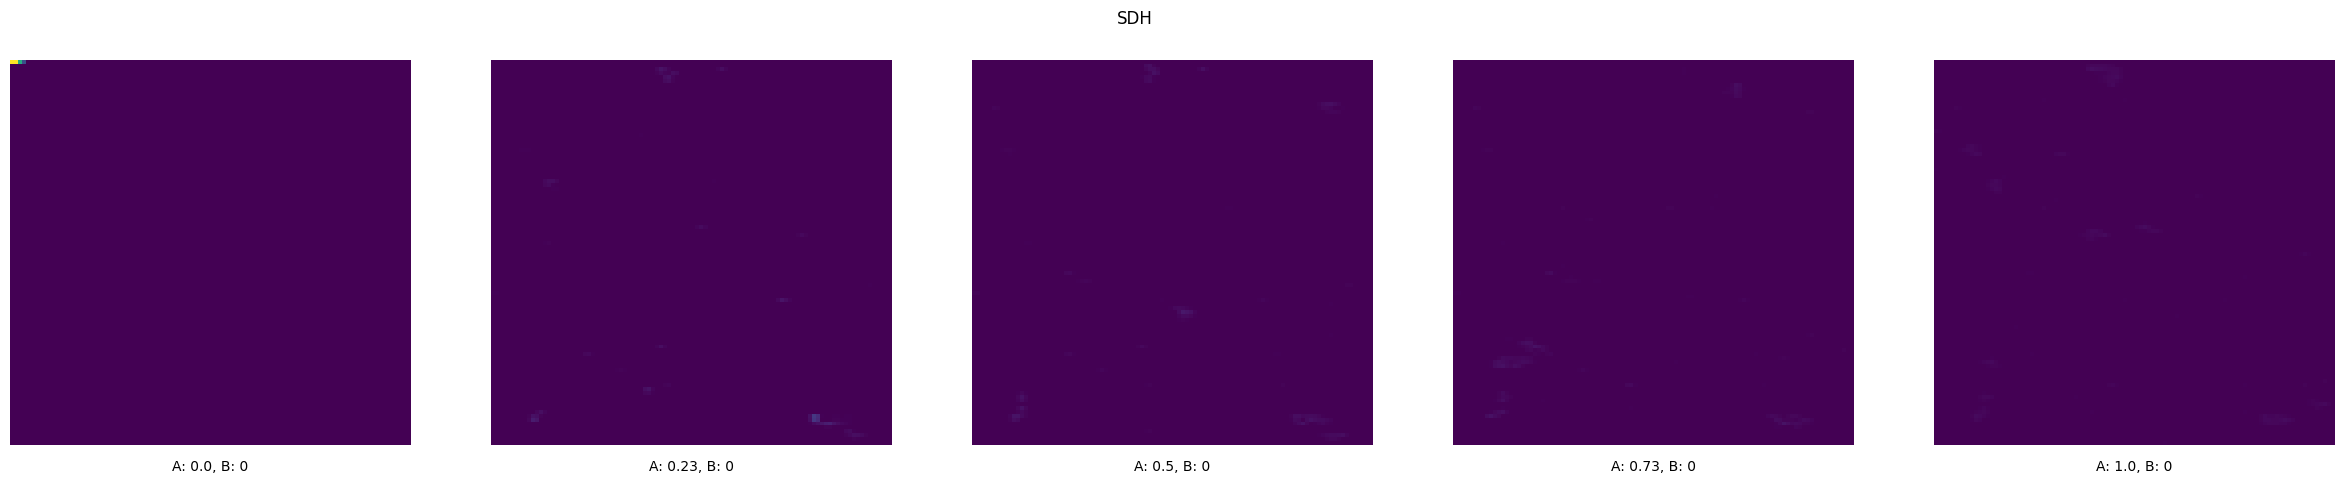

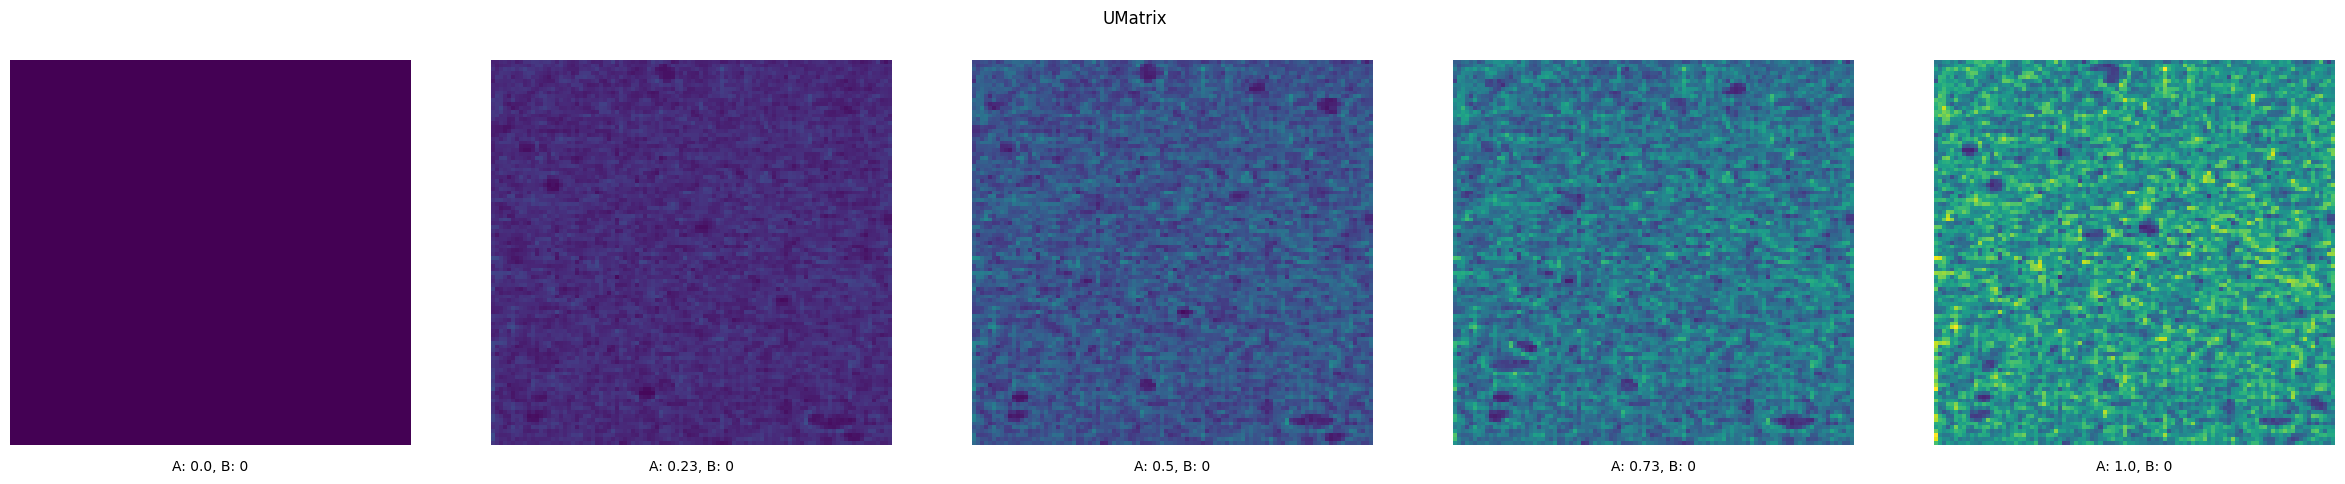

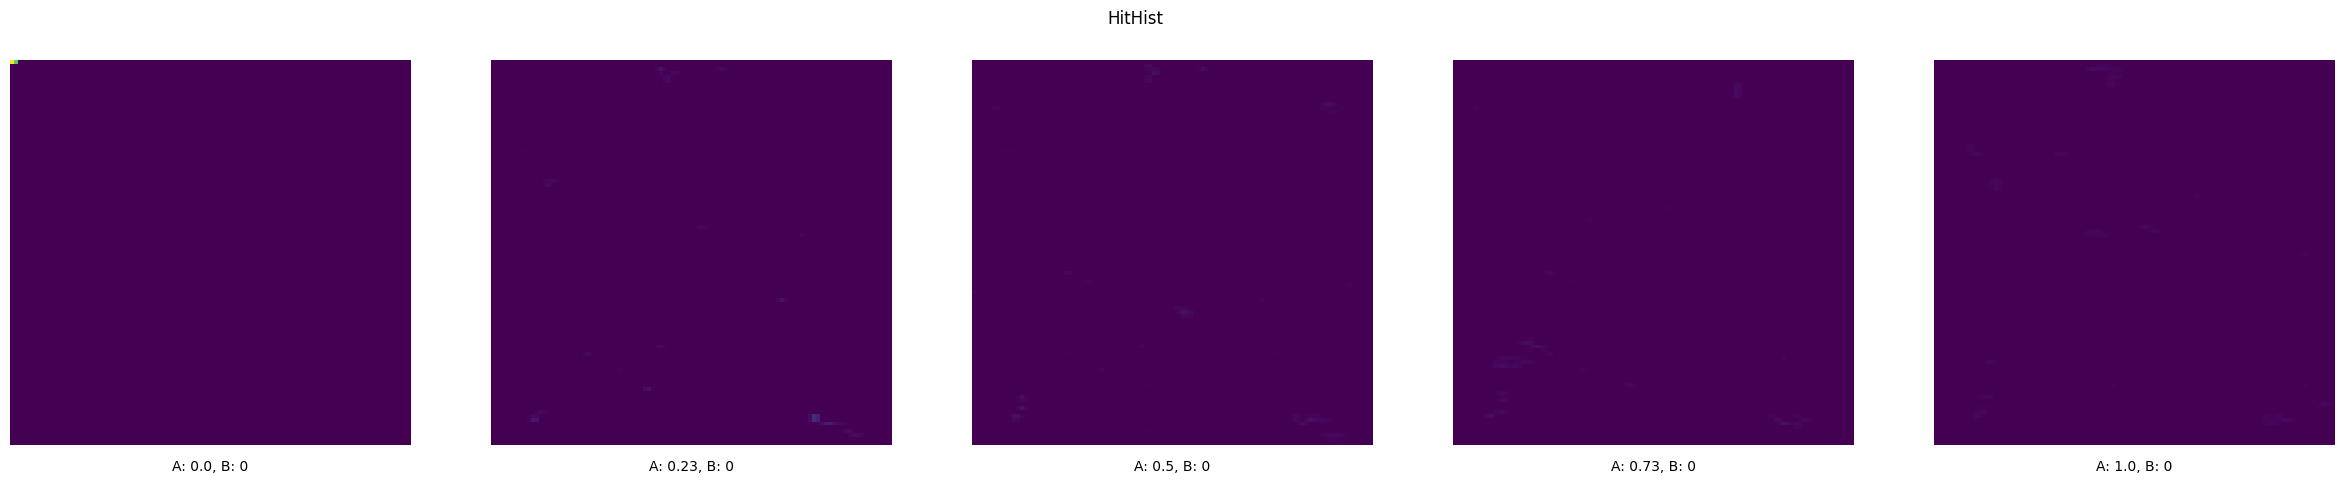

In [28]:
asom_large_8 = setup(
    som_dim=SOM_DIM,
    num_layers=N_LAYERS,
    aspect_selection=[1, 1, 1])